<a href="https://colab.research.google.com/github/timothy2077/1st-Rep/blob/master/Main_Quest2_PocketMon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP 0. 프로젝트 목표

1. 포켓몬, 그 데이터는 어디서 구할까? 에서는 캐글 웹사이트에서 원하는 데이터를 가져와서 준비하기

2. 전설의 포켓몬? 먼저 샅샅이 살펴보자! 에서는 전체 데이터셋을 밑바닥부터 꼼꼼히 탐색하기

3. 전설의 포켓몬과 일반 포켓몬, 그 차이는? 에서는 우리가 원하는 target의 두드러지는 특징을 특히 자세하게 분석하기

4. 모델에 넣기 위해! 데이터 전처리하기 에서는 데이터를 머신러닝 모델에 넣기 적합한 형태로 전처리하기

5. 가랏, 몬스터볼! 에서는 베이스라인 모델을 학습시켜보고, 우리가 처리한 데이터로 성능 향상시키기

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52880 (\N{HANGUL SYLLABLE KAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50937 (\N{HANGUL SYLLABLE WEB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

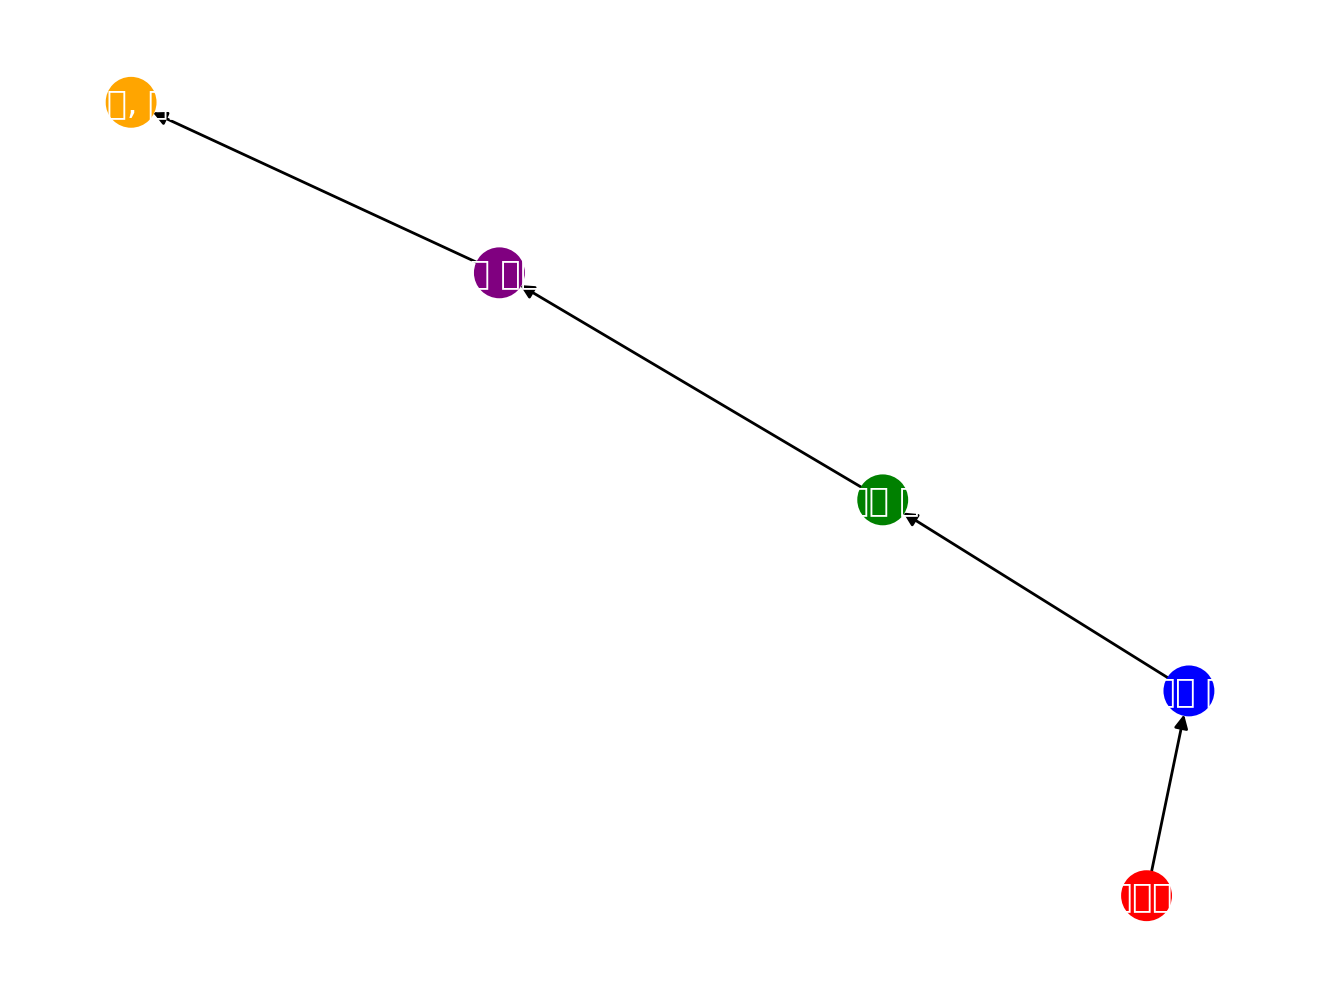

In [224]:
import matplotlib.pyplot as plt
import networkx as nx

# 프로젝트 단계와 색상 정의
steps = {
    '1. 캐글 웹사이트에서 데이터 가져오기': 'red',
    '2. 전체 데이터셋 꼼꼼히 탐색하기': 'blue',
    '3. 전설의 포켓몬과 일반 포켓몬의 차이 분석하기': 'green',
    '4. 데이터를 머신러닝 모델에 넣기 적합한 형태로 전처리하기': 'purple',
    '5. 베이스라인 모델을 학습시키고, 처리한 데이터로 성능 향상시키기': 'orange'
}

# 그래프 생성
G = nx.DiGraph()

# 노드 추가
for step in steps:
    G.add_node(step, color=steps[step])

# 엣지 추가
prev_step = None
for step in steps:
    if prev_step is not None:
        G.add_edge(prev_step, step)
    prev_step = step

# 그래프 그리기
colors = [node[1]['color'] for node in G.nodes(data=True)]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colors, font_color='white')
plt.show()


### STEP 1.포켓몬, 그 데이터는 어디서 구할까?
캐글 웹사이트에서 원하는 데이터를 가져와서 준비하기

$ Cloud Shell에 명령어 입력하기

In [225]:
!mkdir -p ~/aiffel/pokemon_eda/data
!ln -s ~/data/* ~/aiffel/pokemon_eda/data

ln: failed to create symbolic link '/root/aiffel/pokemon_eda/data/*': File exists


$ 라이브러리 가져오기

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [ ]:
!ls ~/aiffel/pokemon_eda/data  # Check if the file is present in the directory
!ls -l ~/aiffel/pokemon_eda/data  # Check the details of the symbolic link

'*'
total 0
lrwxrwxrwx 1 root root 12 Jun 13 02:00 '*' -> '/root/data/*'


$ 데이터셋을 pandas로 불러오기

In [226]:
import os

csv_path = os.getenv("HOME") + "/aiffel/pokemon_eda/data/Pokemon.csv"
if os.path.exists(csv_path):
    print("File exists")
else:
    print("File does not exist")


File does not exist


$ 구글 드라이브 통해 마운트하여 데이터 불러오기

In [227]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [228]:
import pandas as pd

# 파일 경로를 지정합니다. 이 경로는 실제 엑셀 파일이 위치한 Google Drive 내의 경로로 변경해야 합니다.
file_path = '/content/drive/MyDrive/Pokemon.csv'

# 파일 확장자를 확인하고 적절한 엔진을 지정합니다.
if file_path.endswith('.csv'):
    df = pd.read_csv(file_path, encoding='latin-1')  # CSV 파일의 경우, 인코딩을 'latin-1'으로 변경
elif file_path.endswith(('.xls', '.xlsx')):
    df = pd.read_excel(file_path, engine='openpyxl')  # Excel 파일의 경우
else:
    print("지원되지 않는 파일 형식입니다.")

# 데이터프레임의 처음 몇 행을 출력합니다.
print(df.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed Generation Legendary  
0       65       65     45          1     False  
1       80       80     60          1     False  
2      100      100     80          1     False  
3      122      120     80          1     False  
4       60       50     65          1     False  


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Google Drive 공유 링크에서 파일 ID를 추출합니다.
file_id = "1eLUbGgeFtn1rlAtKt1WxfRr4IS0ninRz"

# 'd/와 'view' 사이에 위치한 문자열이 파일 ID입니다.
dwn_url = 'https://drive.google.com/uc?export=download&id=' + file_id

# pandas의 read_csv 함수를 사용하여 CSV 파일을 불러옵니다.
# 여기서는 'ISO-8859-1' 인코딩을 사용하였습니다.
df = pd.read_csv(dwn_url, encoding='ISO-8859-1')
original_data = pd.read_csv(dwn_url, encoding='ISO-8859-1')

print('슝=3')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
슝=3


In [52]:
import pandas as pd

# Replace with the actual path to your Pokemon.csv file
file_path =  'https://drive.google.com/uc?export=download&id='

df = pd.read_csv(dwn_url, encoding='ISO-8859-1')

# Now you can use the 'df' variable
num_unique_names = df['Name'].nunique()
print(f"포켓몬의 종류는 총 {num_unique_names}개입니다.")

포켓몬의 종류는 총 800개입니다.


In [53]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


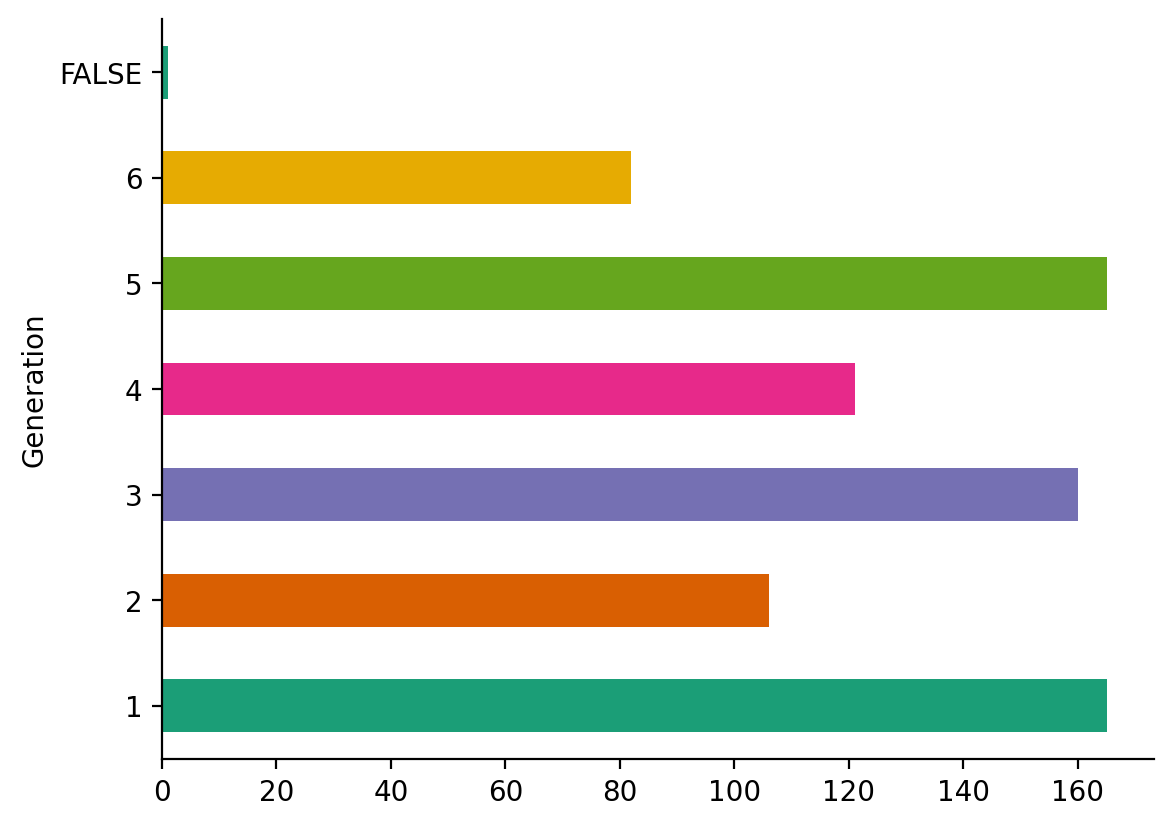

In [229]:
# @title Generation

from matplotlib import pyplot as plt
import seaborn as sns
pokemon.groupby('Generation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [54]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [55]:
# Q. 일반 포켓몬의 데이터셋도 만들어봅시다.
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True) # Filter using the 'Legendary' column
print(ordinary.shape)
ordinary.head()

(734, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 2.전설의 포켓몬? 먼저 샅샅이 살펴보자!
전체 데이터셋을 밑바닥부터 꼼꼼히 탐색하기

$ 빈 데이터 확인하기

In [56]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          1
Type 2        385
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       1
dtype: int64

$ 전체 칼럼 이해하기

In [57]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

$ ID number

In [58]:
len(set(pokemon["#"]))

721

In [59]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


데이터프레임에 있는 포켓몬 이름의 종류를 확인하려면, pandas의 nunique() 함수를 사용할 수 있습니다. 이 함수는 데이터프레임의 특정 열에 있는 고유한 값의 개수를 반환합니다. 아래는 그 예시입니다:



$ Name: 이름 (모든 이름은 Unique하구나!)

In [60]:
# 'Name' 열을 집합으로 변환하여 중복을 제거합니다.
unique_pokemon_names = set(df['Name'])

# 집합의 길이를 계산하여 유일한 포켓몬 이름의 개수를 확인합니다.
num_unique_pokemon_names = len(unique_pokemon_names)

print(f'유일한 포켓몬 이름의 개수: {num_unique_pokemon_names}')

유일한 포켓몬 이름의 개수: 800


# Type 1 & Type 2: 포켓몬의 속성


In [65]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [69]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(19, 20)

$ Type 1에는 총 19가지, Type  2에는 총 19가지 속성이 포함

$ 파이썬 차집합 함수(set difference)

In [70]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{'273'}

In [68]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

19
['Electric', 'Psychic', 'Poison', 'Grass', 'Ground', 'Normal', 'Flying', nan, 'Fire', 'Bug', 'Dragon', 'Fighting', 'Dark', 'Ghost', 'Fairy', 'Water', 'Steel', 'Rock', 'Ice']


$ 판다스 isna()함수

In [230]:
pokemon["Type 2"].isna().sum()

385

$ Type 1 데이터 분포 Plot

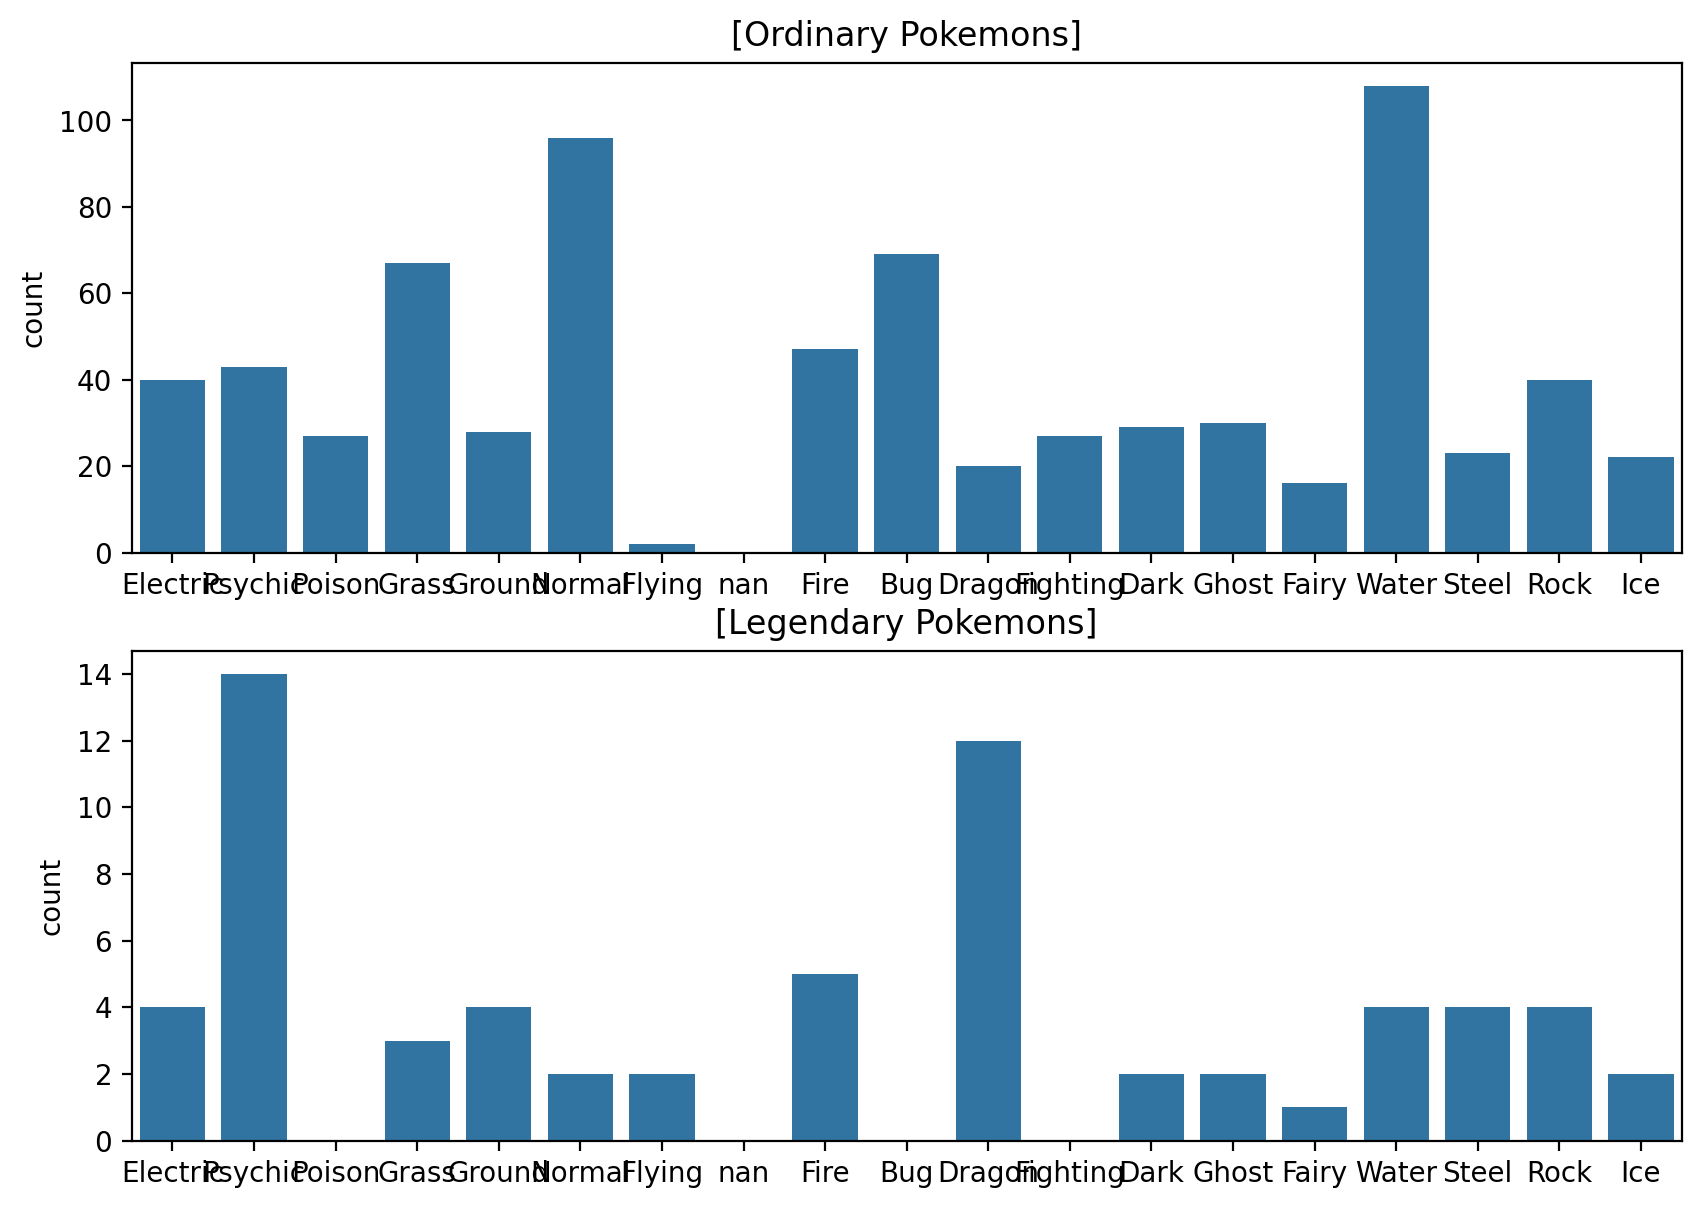

In [73]:
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

$ 그래프를 간결하게 만들기 위해 x축과 y축의 레이블을 명확하게 하고 범례를 추가하기

<ipython-input-74-f4abde744583>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ordinary, x="Type 1", order=types, palette='Set2')
<ipython-input-74-f4abde744583>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=legendary, x="Type 1", order=types, palette='Set2')


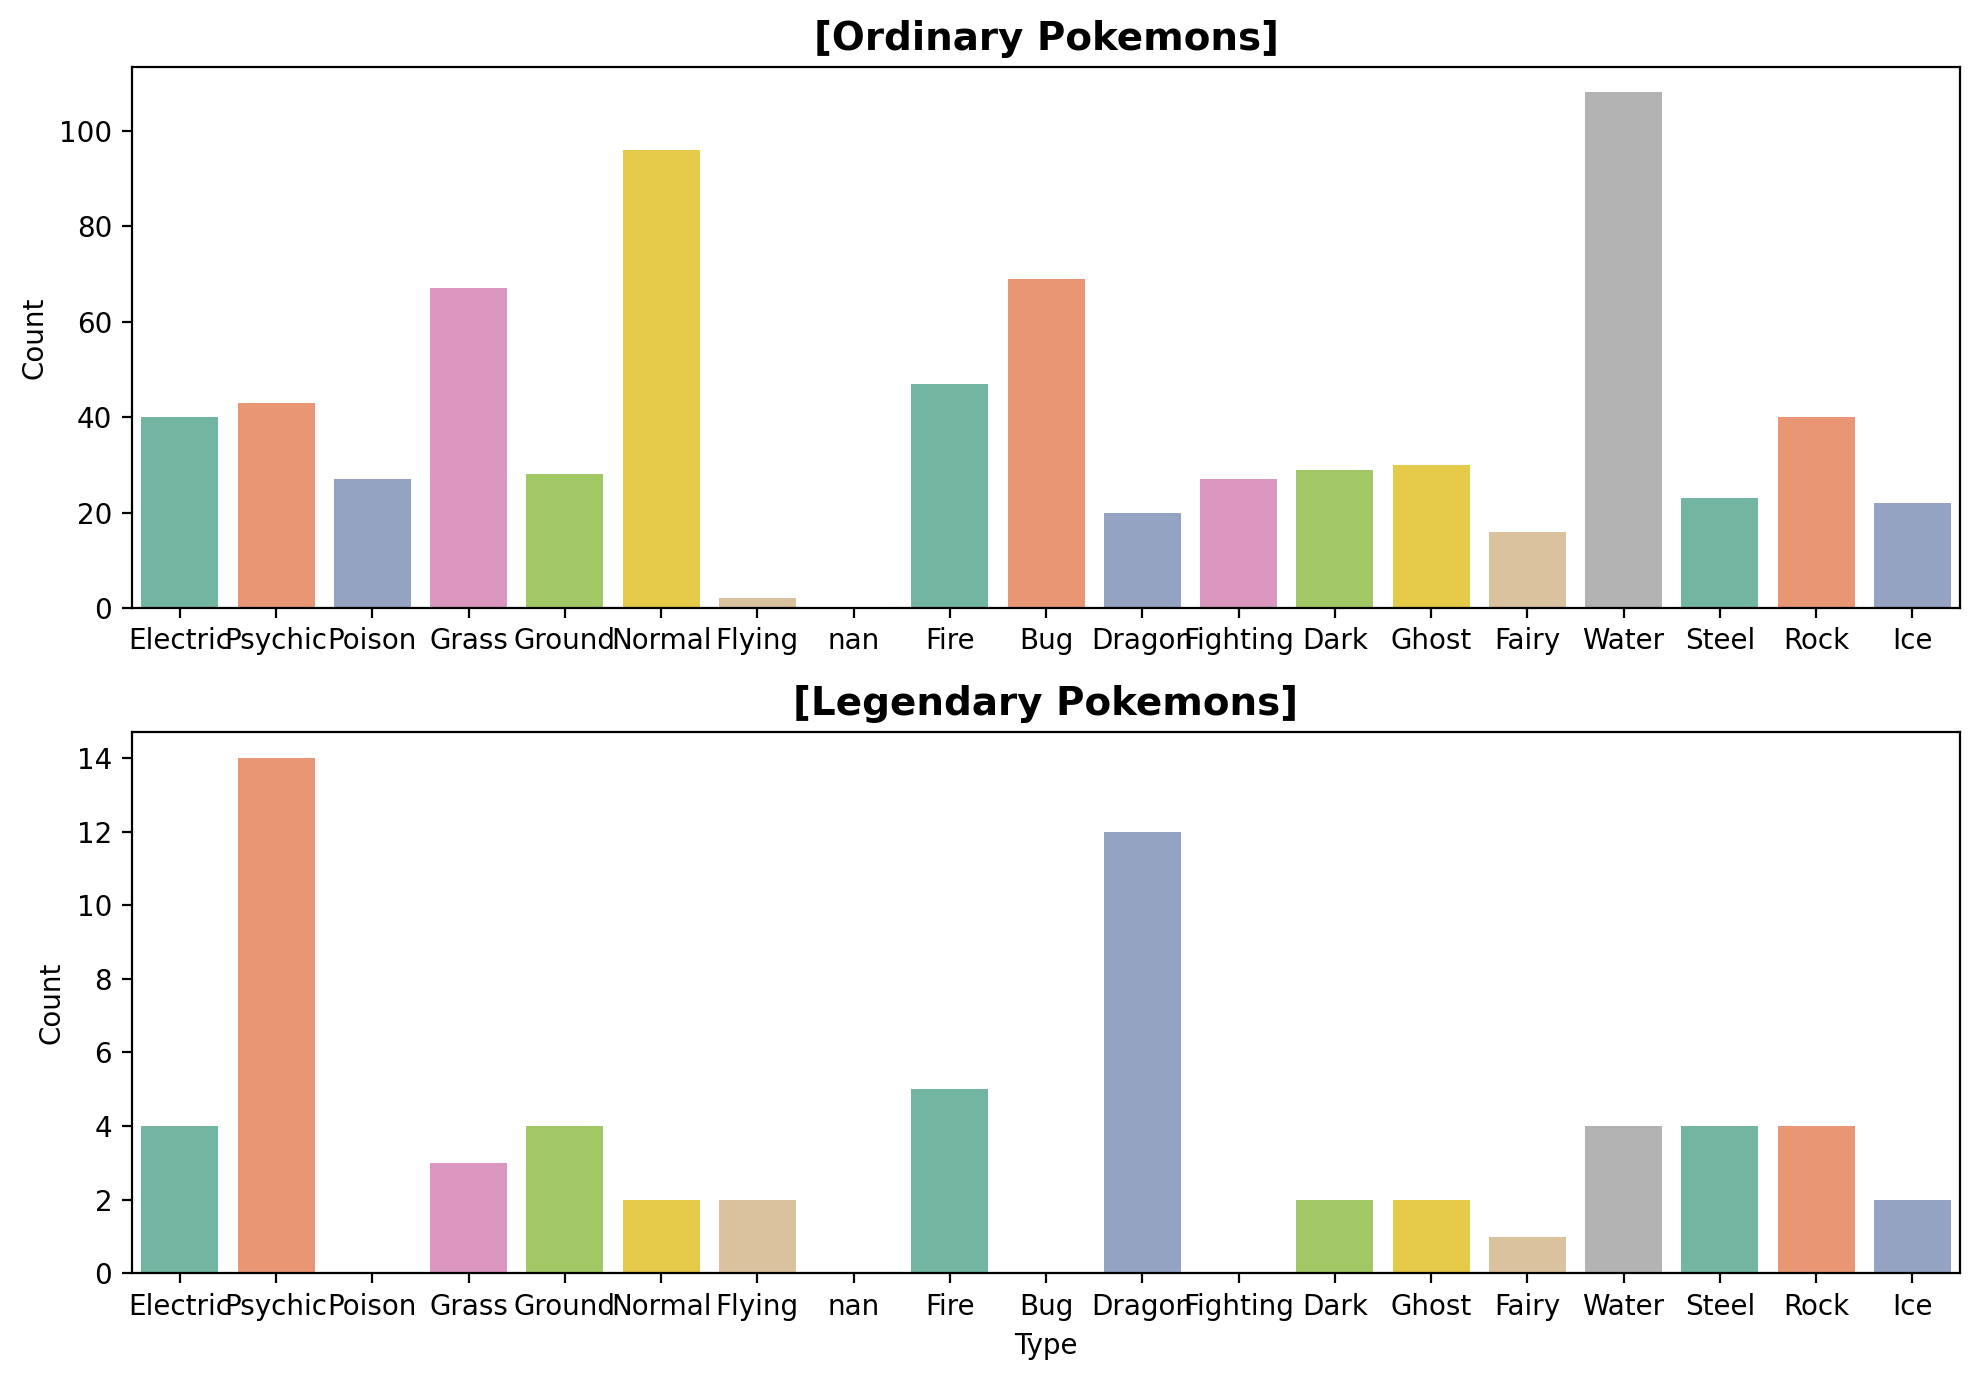

In [74]:
plt.figure(figsize=(10, 7))

# Ordinary Pokemons
plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types, palette='Set2')
plt.xlabel('')  # x축 레이블을 제거합니다.
plt.ylabel('Count')  # y축 레이블을 추가합니다.
plt.title("[Ordinary Pokemons]", fontsize=14, fontweight='bold')  # 제목의 글꼴 크기와 두께를 조정합니다.

# Legendary Pokemons
plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types, palette='Set2')
plt.xlabel('Type')  # x축 레이블을 추가합니다.
plt.ylabel('Count')  # y축 레이블을 추가합니다.
plt.title("[Legendary Pokemons]", fontsize=14, fontweight='bold')  # 제목의 글꼴 크기와 두께를 조정합니다.

plt.tight_layout()  # 그래프 간의 간격을 조정합니다.
plt.show()


$ 분석: 일반 포켓몬의 속성 분포와 전설의 포켓몬의 속성 분포는 어떤 차이가 있나요?

일반 포켓몬은 물 속성이 가장 많으며, 그 다음으로 노말과 비행 속성이 많고 속성 분포가 비교적 균일합니다.
전설의 포켓몬은 에스퍼 속성이 가장 많으며 그 다음으로 불꽃과 전기 속성이 많고 속성 분포가 특정 속성에 치우침이 있습니다.
이러한 차이는 게임 내에서 전설의 포켓몬이 특별한 위치를 차지하고 있음을 나타냅니다.
전설의 포켓몬은 일반적으로 더 드물고 강력한 능력을 가지고 있어 그들의 속성 분포가 더 특정 속성(Dragon, Psychic)에 집중되어 있는 경향이 있습니다.
반면, 일반 포켓몬은 더 다양한 환경에서 발견되며 그에 따라 속성 분포도 더 다양합니다.


$ 피벗 테이블로 각 속성에 레전더리 포켓몬들이 %씩 있는지 확인하기(sort_value) 활용하기

In [75]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.5
Dragon,0.375
Psychic,0.245614
Steel,0.148148
Ground,0.125
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


$ Type 2 데이터 분포 plot


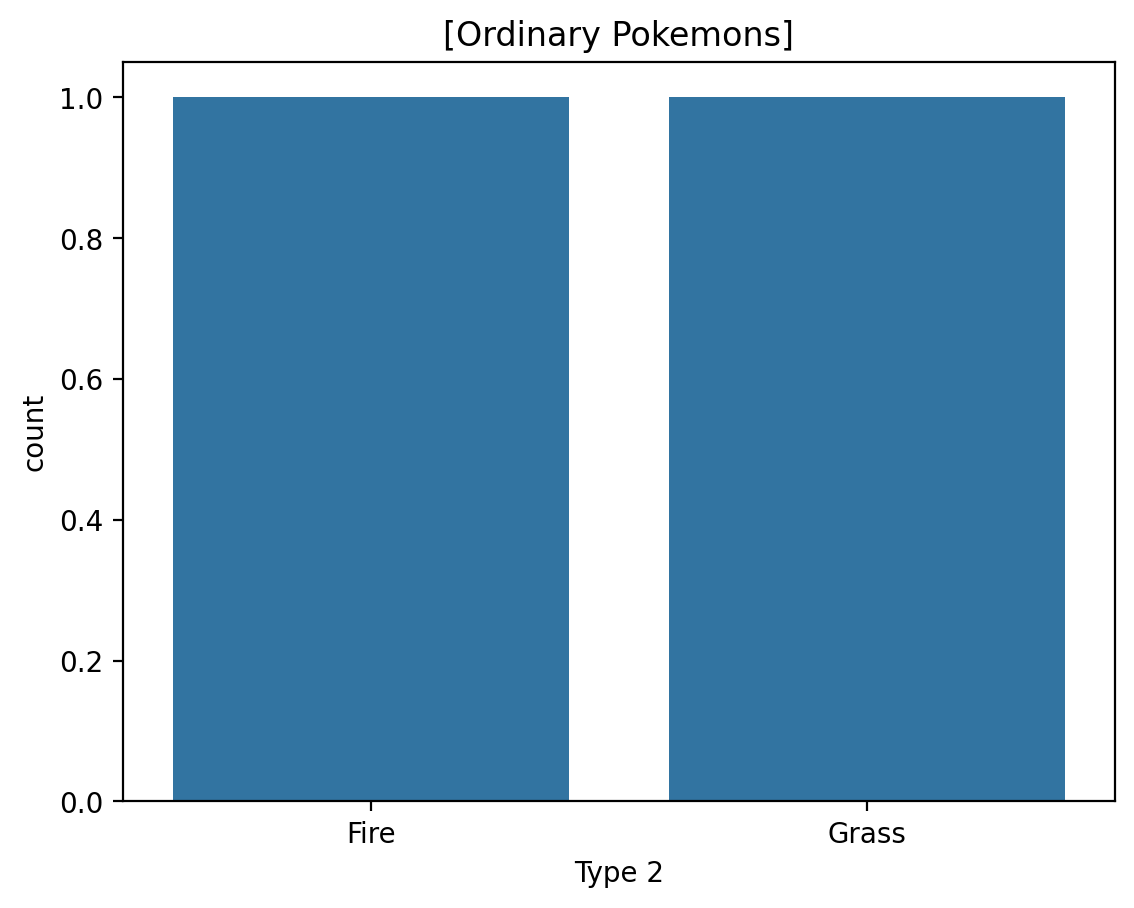

In [231]:
import pandas as pd

# 'df'를 적절한 값으로 정의합니다. 예를 들어, pandas DataFrame을 생성합니다.
df = pd.DataFrame({
    'Legendary': [False, True, False, True],  # 이는 예시입니다. 실제 데이터에 맞게 수정하세요.
    'Type 2': ['Fire', 'Water', 'Grass', 'Electric']  # 이는 예시입니다. 실제 데이터에 맞게 수정하세요.
})

# 이제 'df'를 사용하여 그래프를 그릴 수 있습니다.
sns.countplot(data=df[df['Legendary']==False], x='Type 2')  # 일반 포켓몬의 'Type 2' 속성에 대한 막대 그래프를 그립니다.
plt.title("[Ordinary Pokemons]")

plt.show()


In [232]:
# Q. Type 2에 대해서도 피벗 테이블을 만들어봅시다.
# pandas 라이브러리를 사용하여 피벗 테이블을 만듭니다.
pivot_table_Type2 = pd.pivot_table(df, values='Legendary', index='Type 2', aggfunc=np.sum)

# 피벗 테이블을 출력합니다.
print(pivot_table_Type2)


          Legendary
Type 2             
Electric          1
Fire              0
Grass             0
Water             1


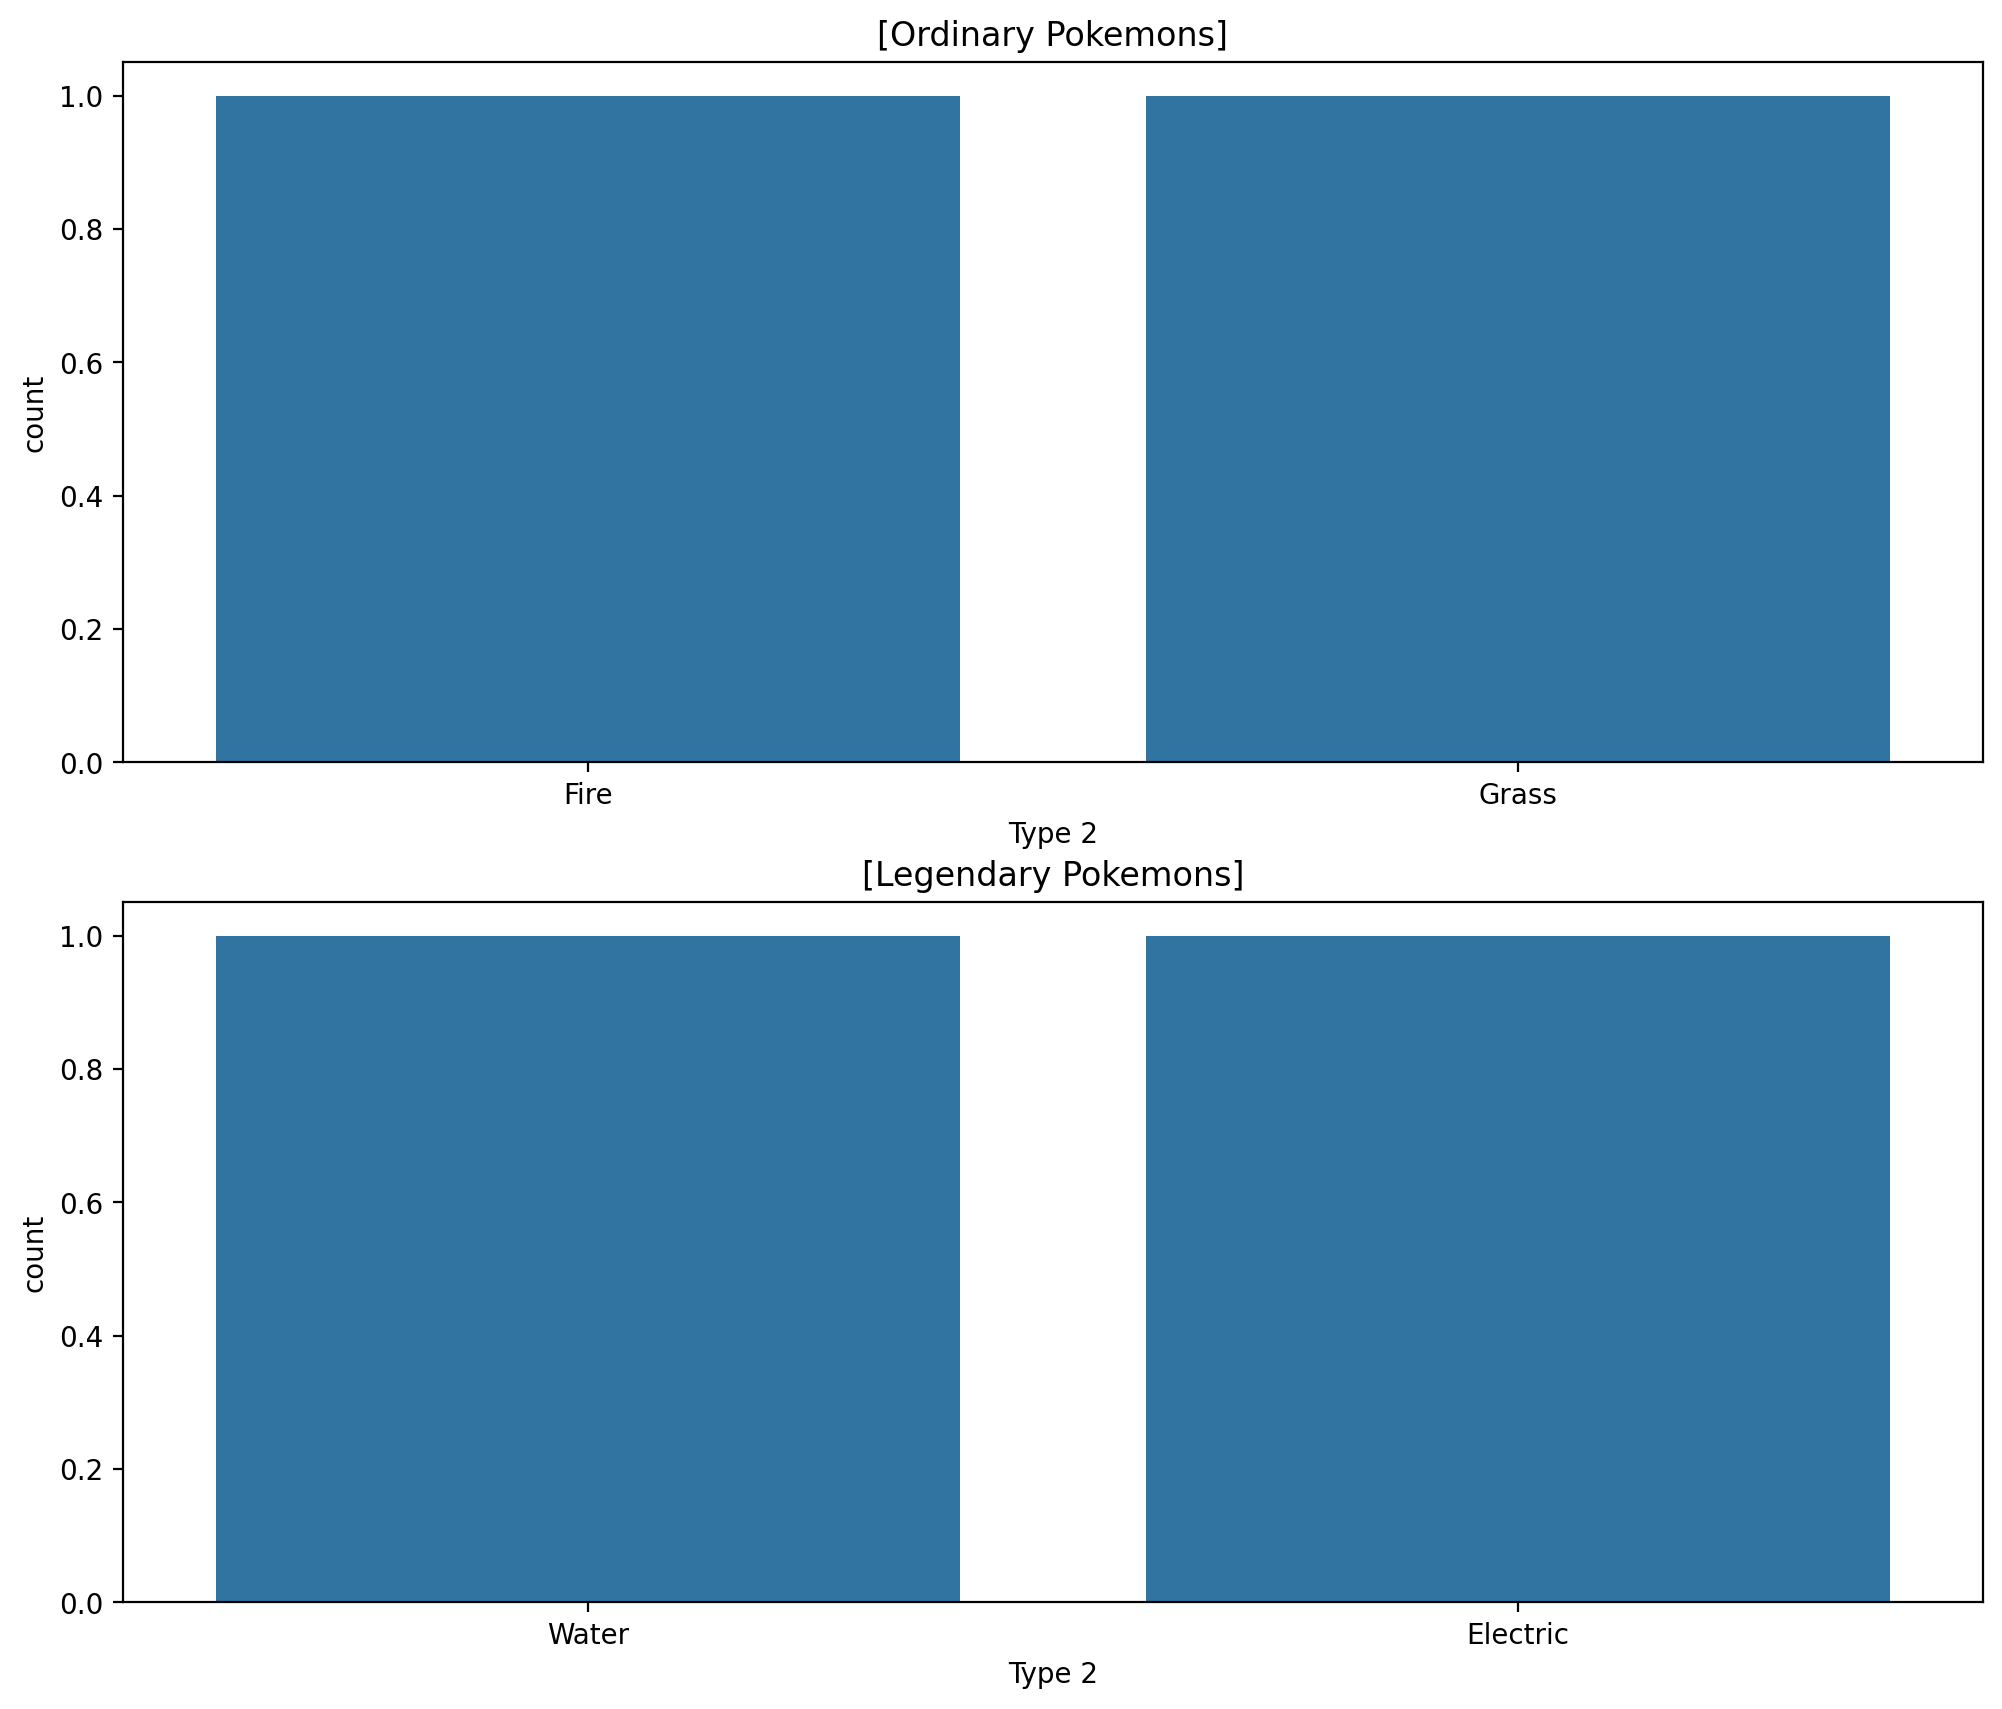

In [98]:
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=df[df['Legendary']==False], x='Type 2')  # 일반 포켓몬의 'Type 2' 속성에 대한 막대 그래프를 그립니다.
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=df[df['Legendary']==True], x='Type 2')  # 전설의 포켓몬의 'Type 2' 속성에 대한 막대 그래프를 그립니다.
plt.title("[Legendary Pokemons]")

plt.show()



$ seaborn 라이브러리의 countplot 함수를 사용하여 다양한 색상을 사용하는 방법은 palette 매개변수를 사용하기

이미지에 나타난 바 그래프의 색상을 코드에 반영하기 위해, palette 인자를 sns.countplot 함수에 추가하면서 'Fire’는 파란색으로, 'Grass’는 주황색으로 표시하기

<ipython-input-102-9ff3c70a4aa1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Legendary']==False], x='Type 2', palette=['blue', 'orange'])  # 일반 포켓몬의 'Type 2' 속성에 대한 막대 그래프를 그립니다.
<ipython-input-102-9ff3c70a4aa1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Legendary']==True], x='Type 2', palette=['blue', 'orange'])  # 전설의 포켓몬의 'Type 2' 속성에 대한 막대 그래프를 그립니다.


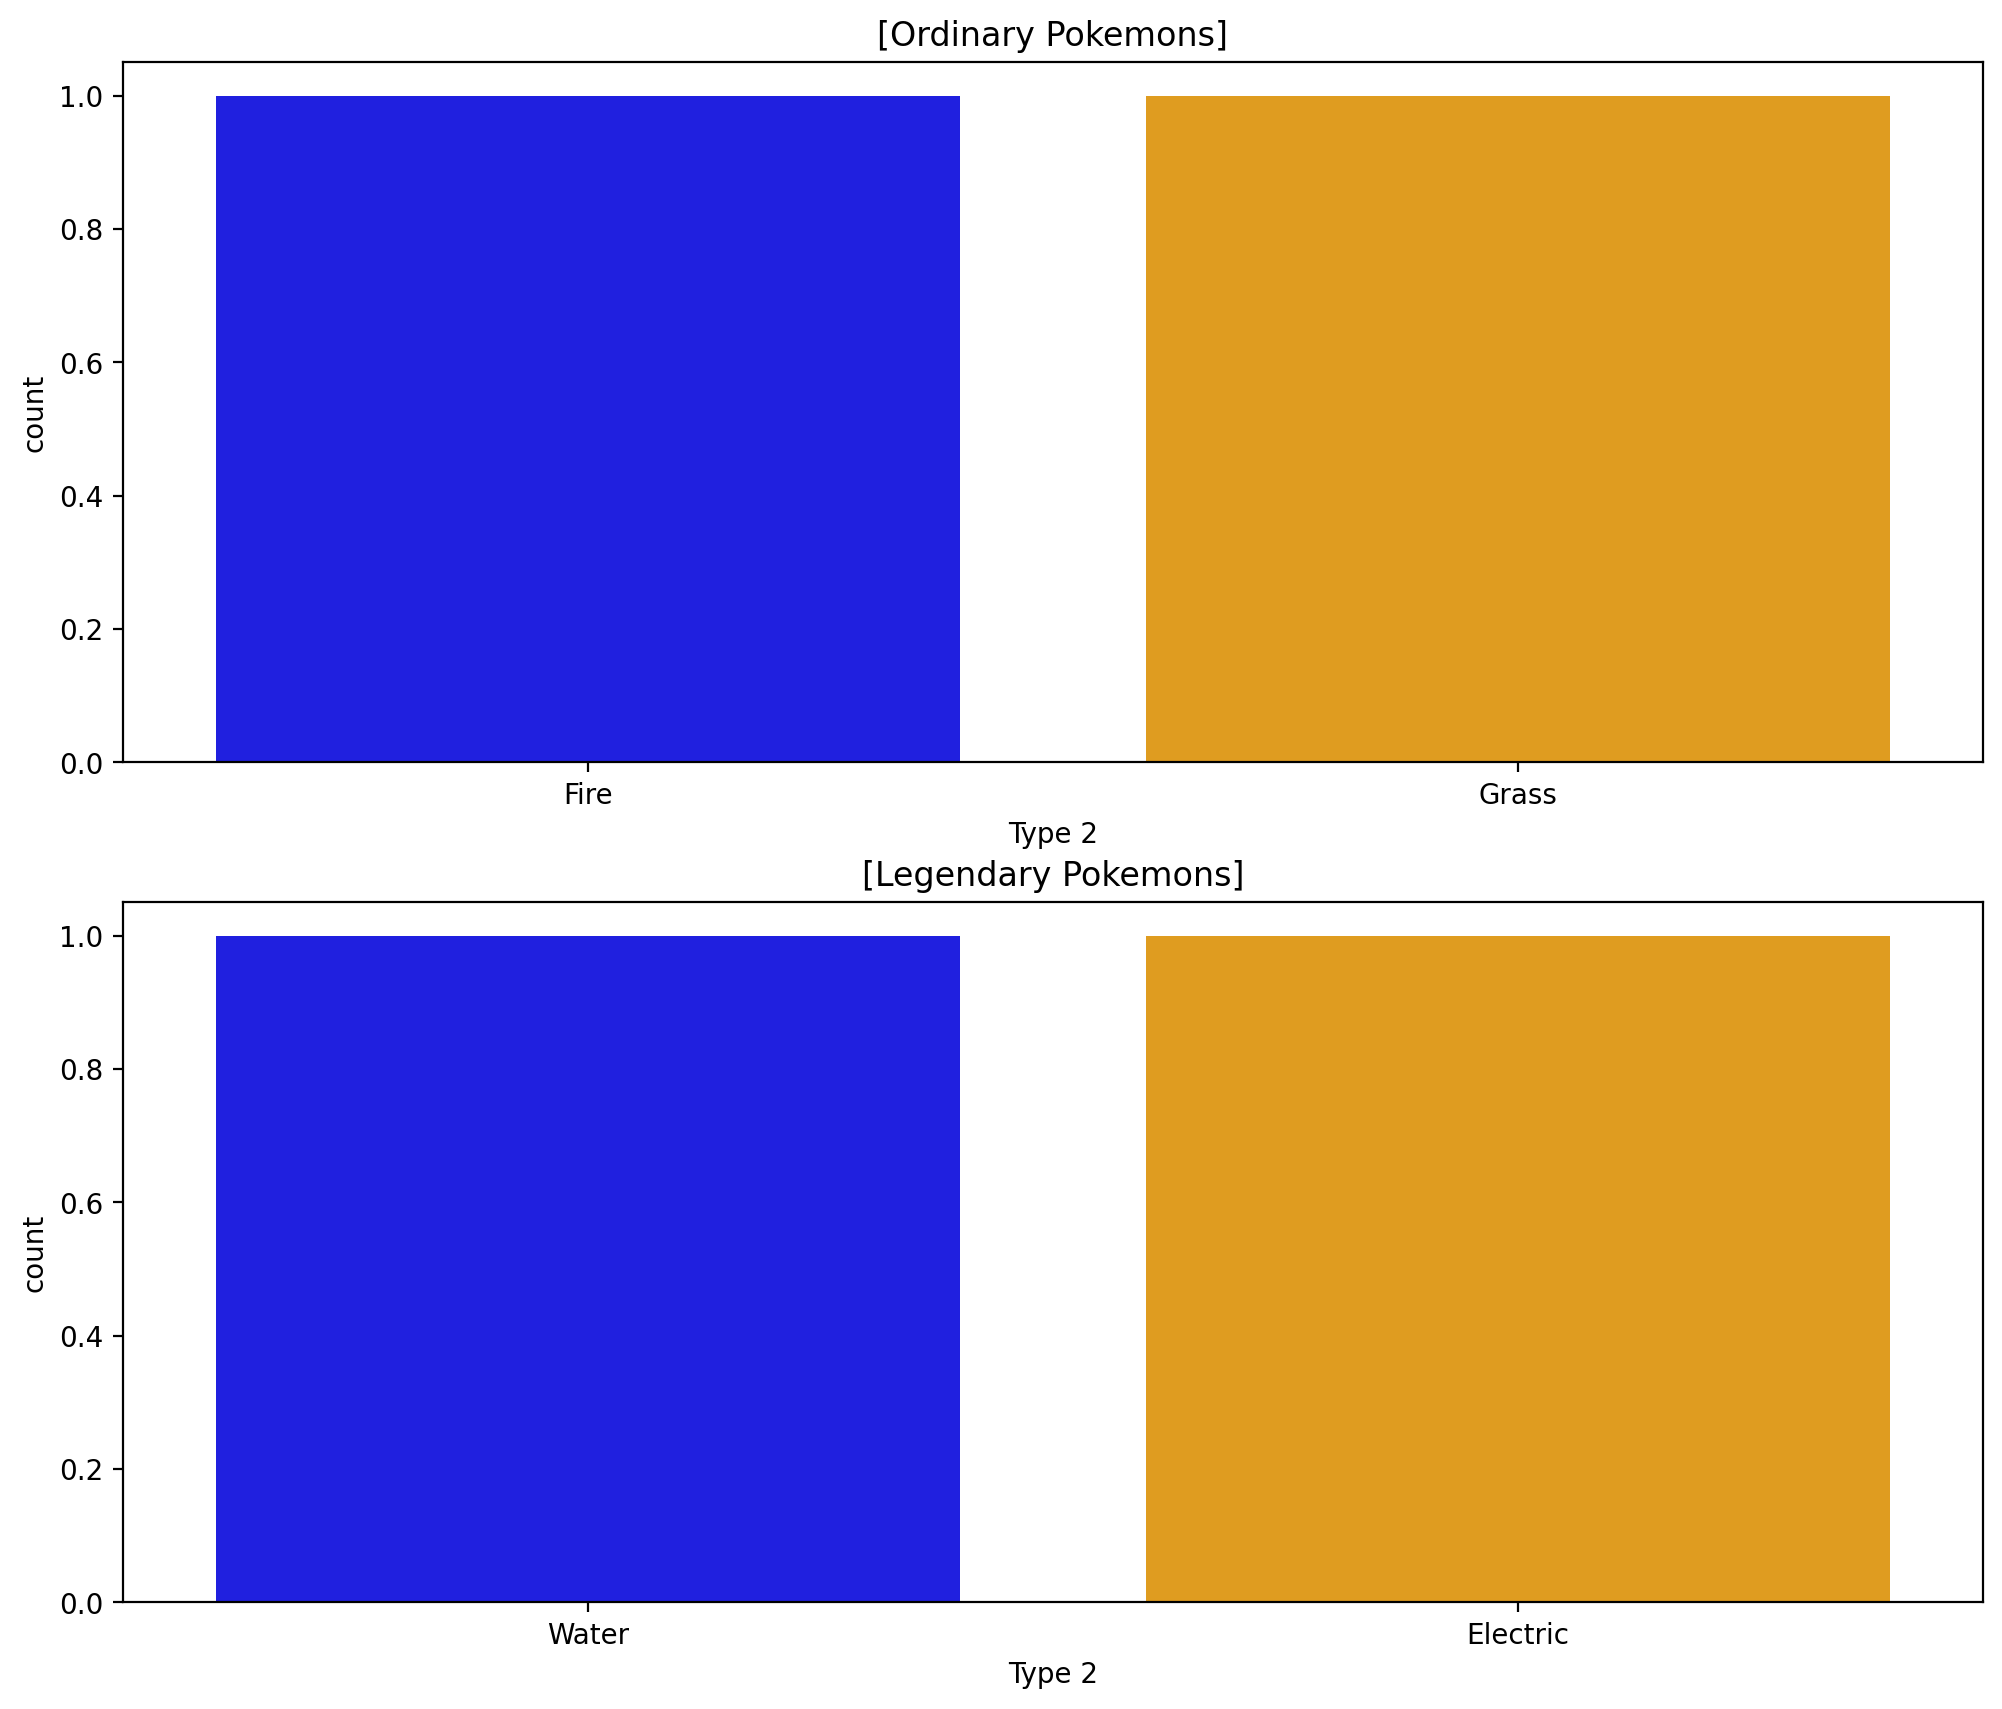

In [102]:
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=df[df['Legendary']==False], x='Type 2', palette=['blue', 'orange'])  # 일반 포켓몬의 'Type 2' 속성에 대한 막대 그래프를 그립니다.
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=df[df['Legendary']==True], x='Type 2', palette=['blue', 'orange'])  # 전설의 포켓몬의 'Type 2' 속성에 대한 막대 그래프를 그립니다.
plt.title("[Legendary Pokemons]")

plt.show()


In [100]:
# Q. Type 2에 대해서도 피벗 테이블을 만들어봅시다.
# pandas 라이브러리를 사용하여 피벗 테이블을 만듭니다.
pivot_table_Type2 = pd.pivot_table(df, values='Legendary', index='Type 2', aggfunc=np.sum)

# 피벗 테이블을 출력합니다.
print(pivot_table_Type2)


          Legendary
Type 2             
Electric          1
Fire              0
Grass             0
Water             1


분석: Type 2에서는 Fire 속성 포켓몬의 Legendary 비율이 25%로 가장 높습니다.

$ Total: 모든 스탯의 총합

In [103]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [104]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [106]:
# stats는 포켓몬의 통계를 나타내는 열들의 리스트입니다.
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

# 'pokemon[stats].values'의 총합과 'pokemon['Total'].values'가 같은지 비교합니다.
equal_totals = (pokemon['Total'].values == pokemon[stats].values.sum(axis=1))

# 비교 결과가 True인 포켓몬의 수를 계산합니다.
num_equal_totals = equal_totals.sum()

print(f"포켓몬 중 'Total' 값과 통계의 총합이 같은 포켓몬의 수는 {num_equal_totals}마리입니다.")


포켓몬 중 'Total' 값과 통계의 총합이 같은 포켓몬의 수는 799마리입니다.


$ 위의 코드는 ‘Total’ 열의 값과 통계 열들의 합이 같은 포켓몬의 수를 계산하기 ‘Total’ 값과 통계의 총합이 같은 포켓몬의 수를 확인할 수 있음

$ Total값에 따른 분포 plot

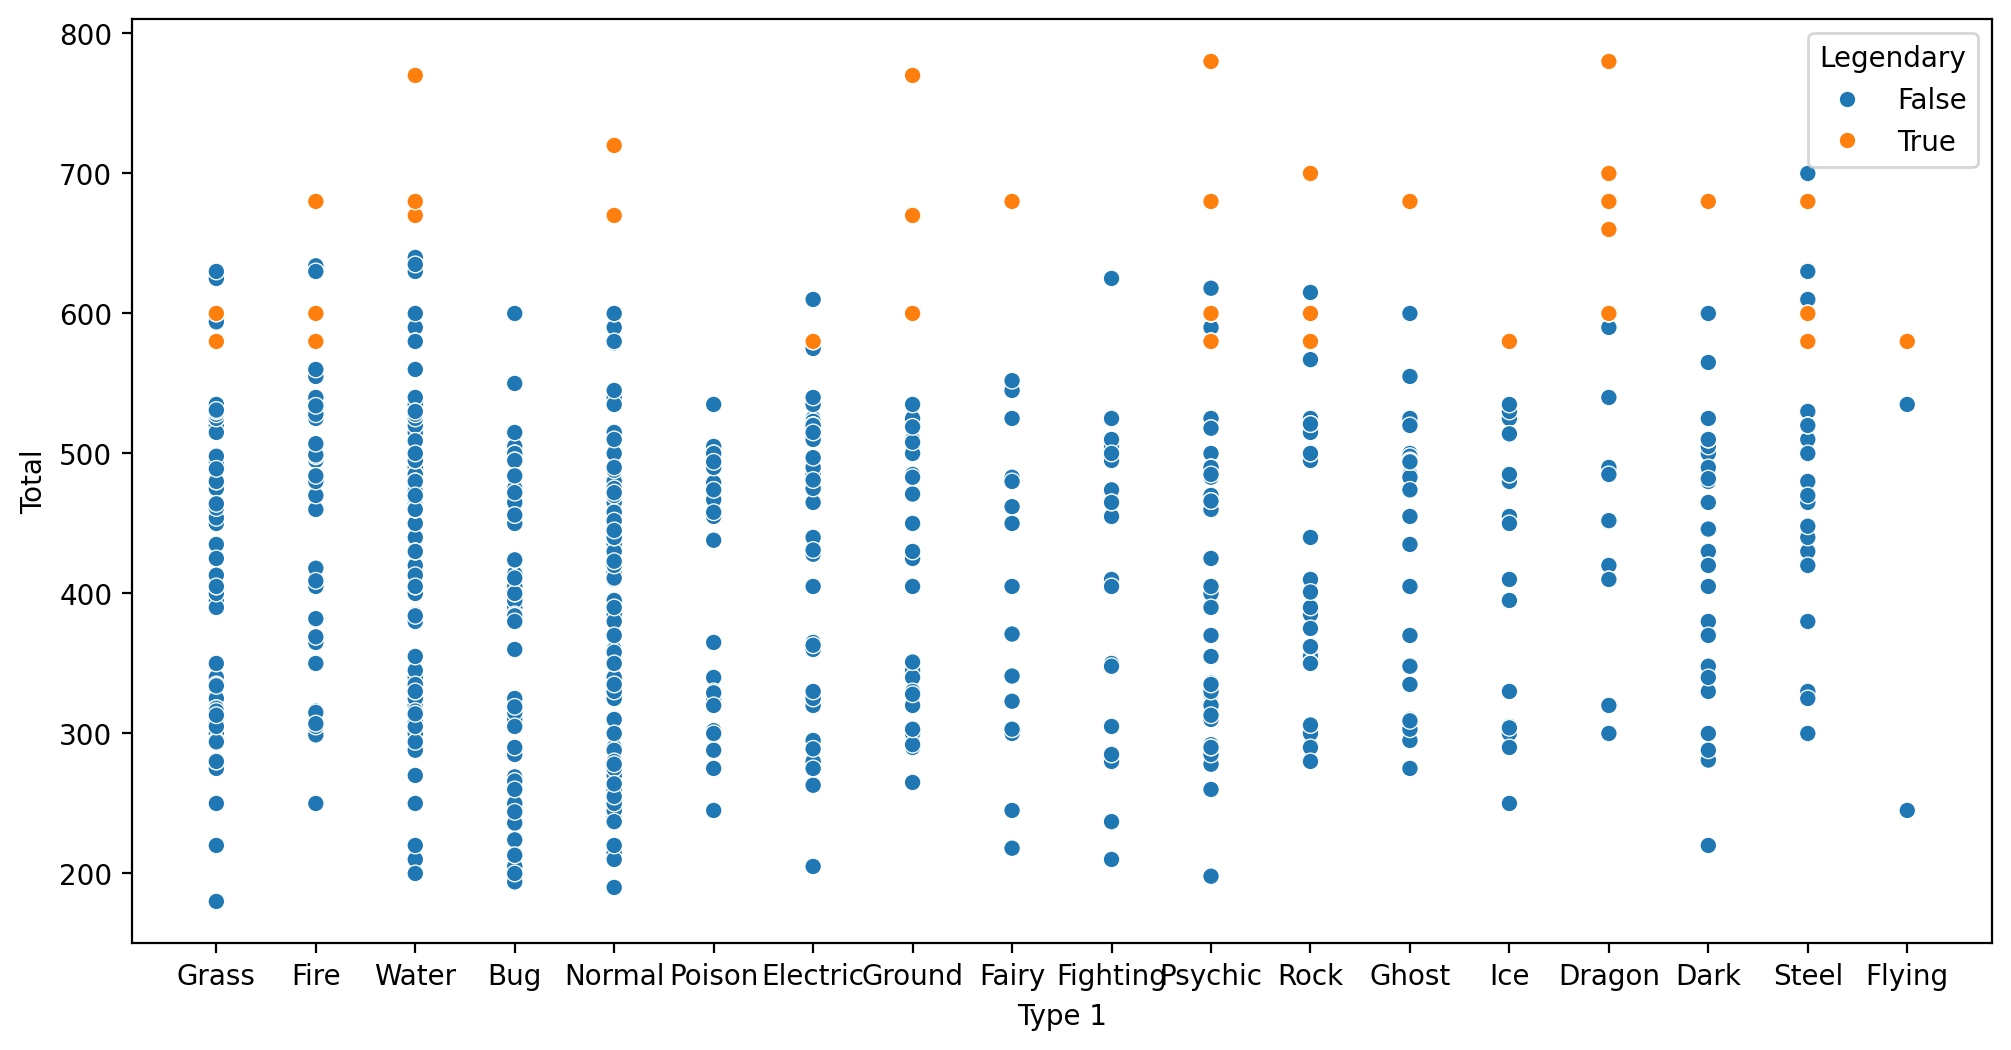

In [107]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

$ Legendary 여부에 따라 색깔(hue)을 달리하도록 했습니다. 점의 색깔을 보면 Type 1 별로 Total 값을 확인했을 때, 전설의 포켓몬은 주로 Total 스탯 값이 높다는 것이 확인

$ 세부스탯: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

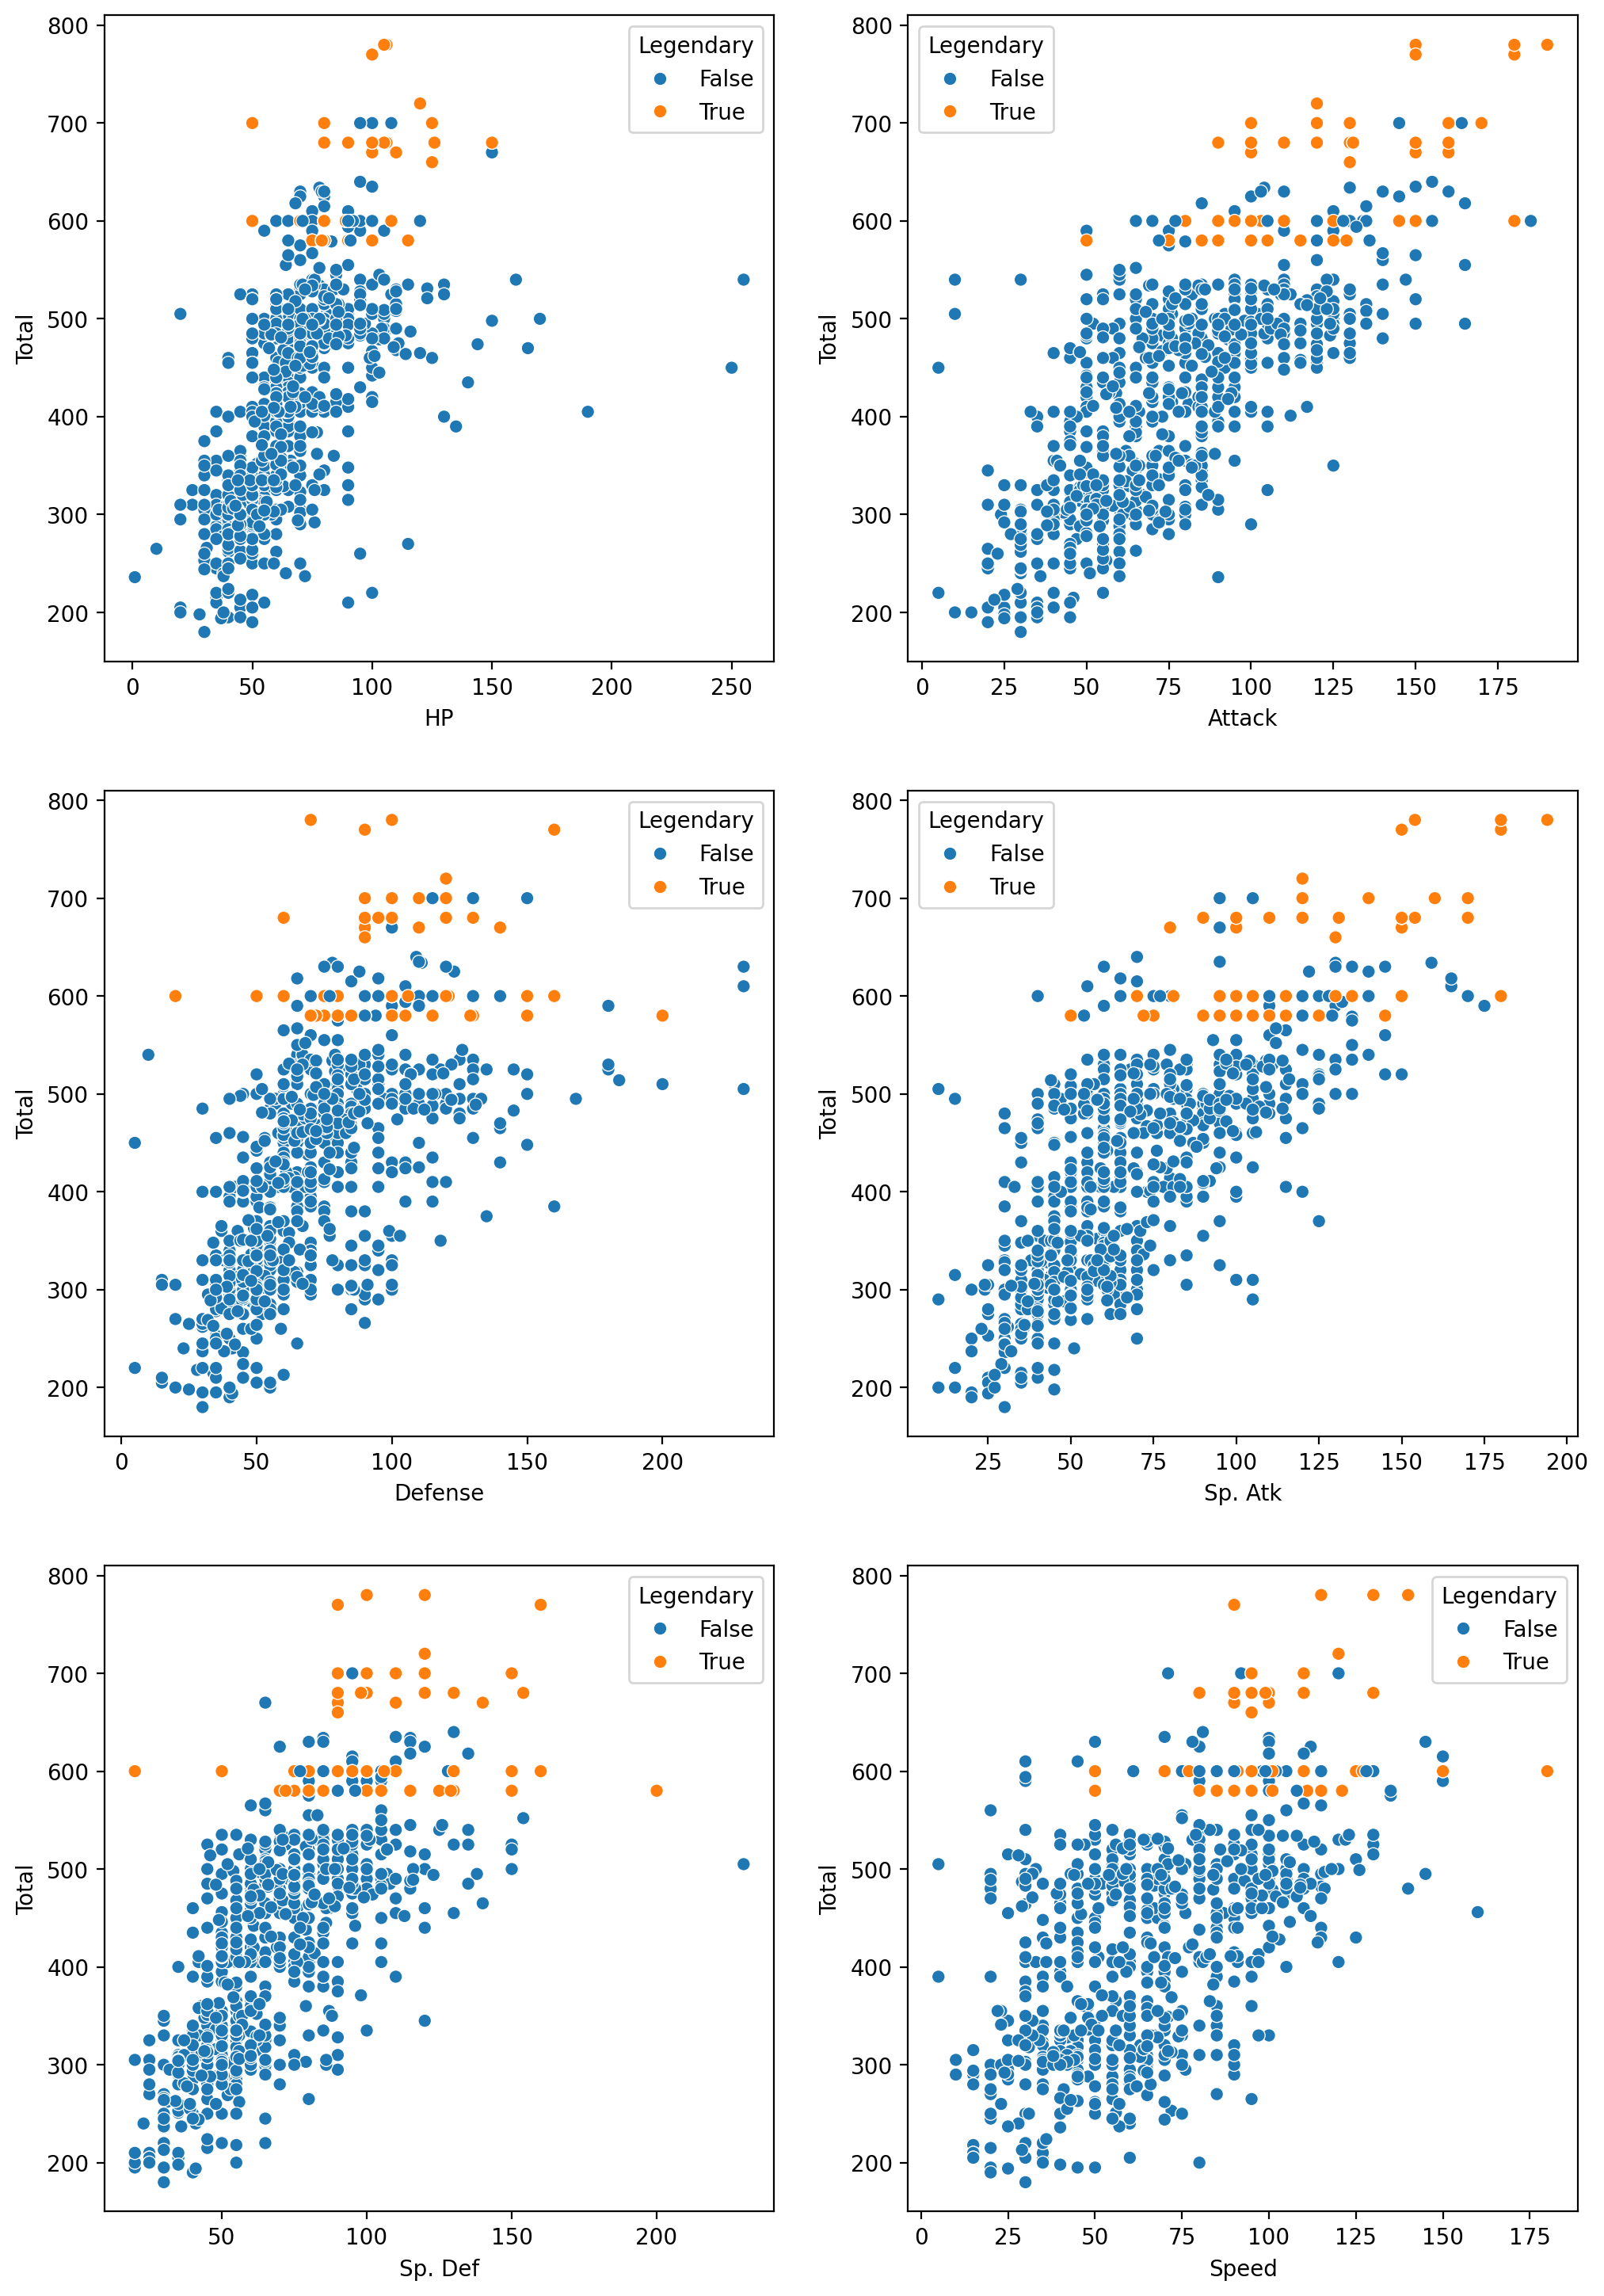

In [108]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()


$ 각 스탯에 대한 분석

HP, Defense, Sp. Def
전설의 포켓몬은 주로 높은 스탯을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있습니다.

그러나 그 포켓몬들도 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬들로 보입니다. (ex. 방어형, 공격형 등)

Attack, Sp. Atk, Speed
이 세 가지 스탯은 Total과 거의 비례합니다.
전설의 포켓몬이 각 스탯의 최대치를 차지하고 있습니다.

$ Generation: 포켓몬의 세대

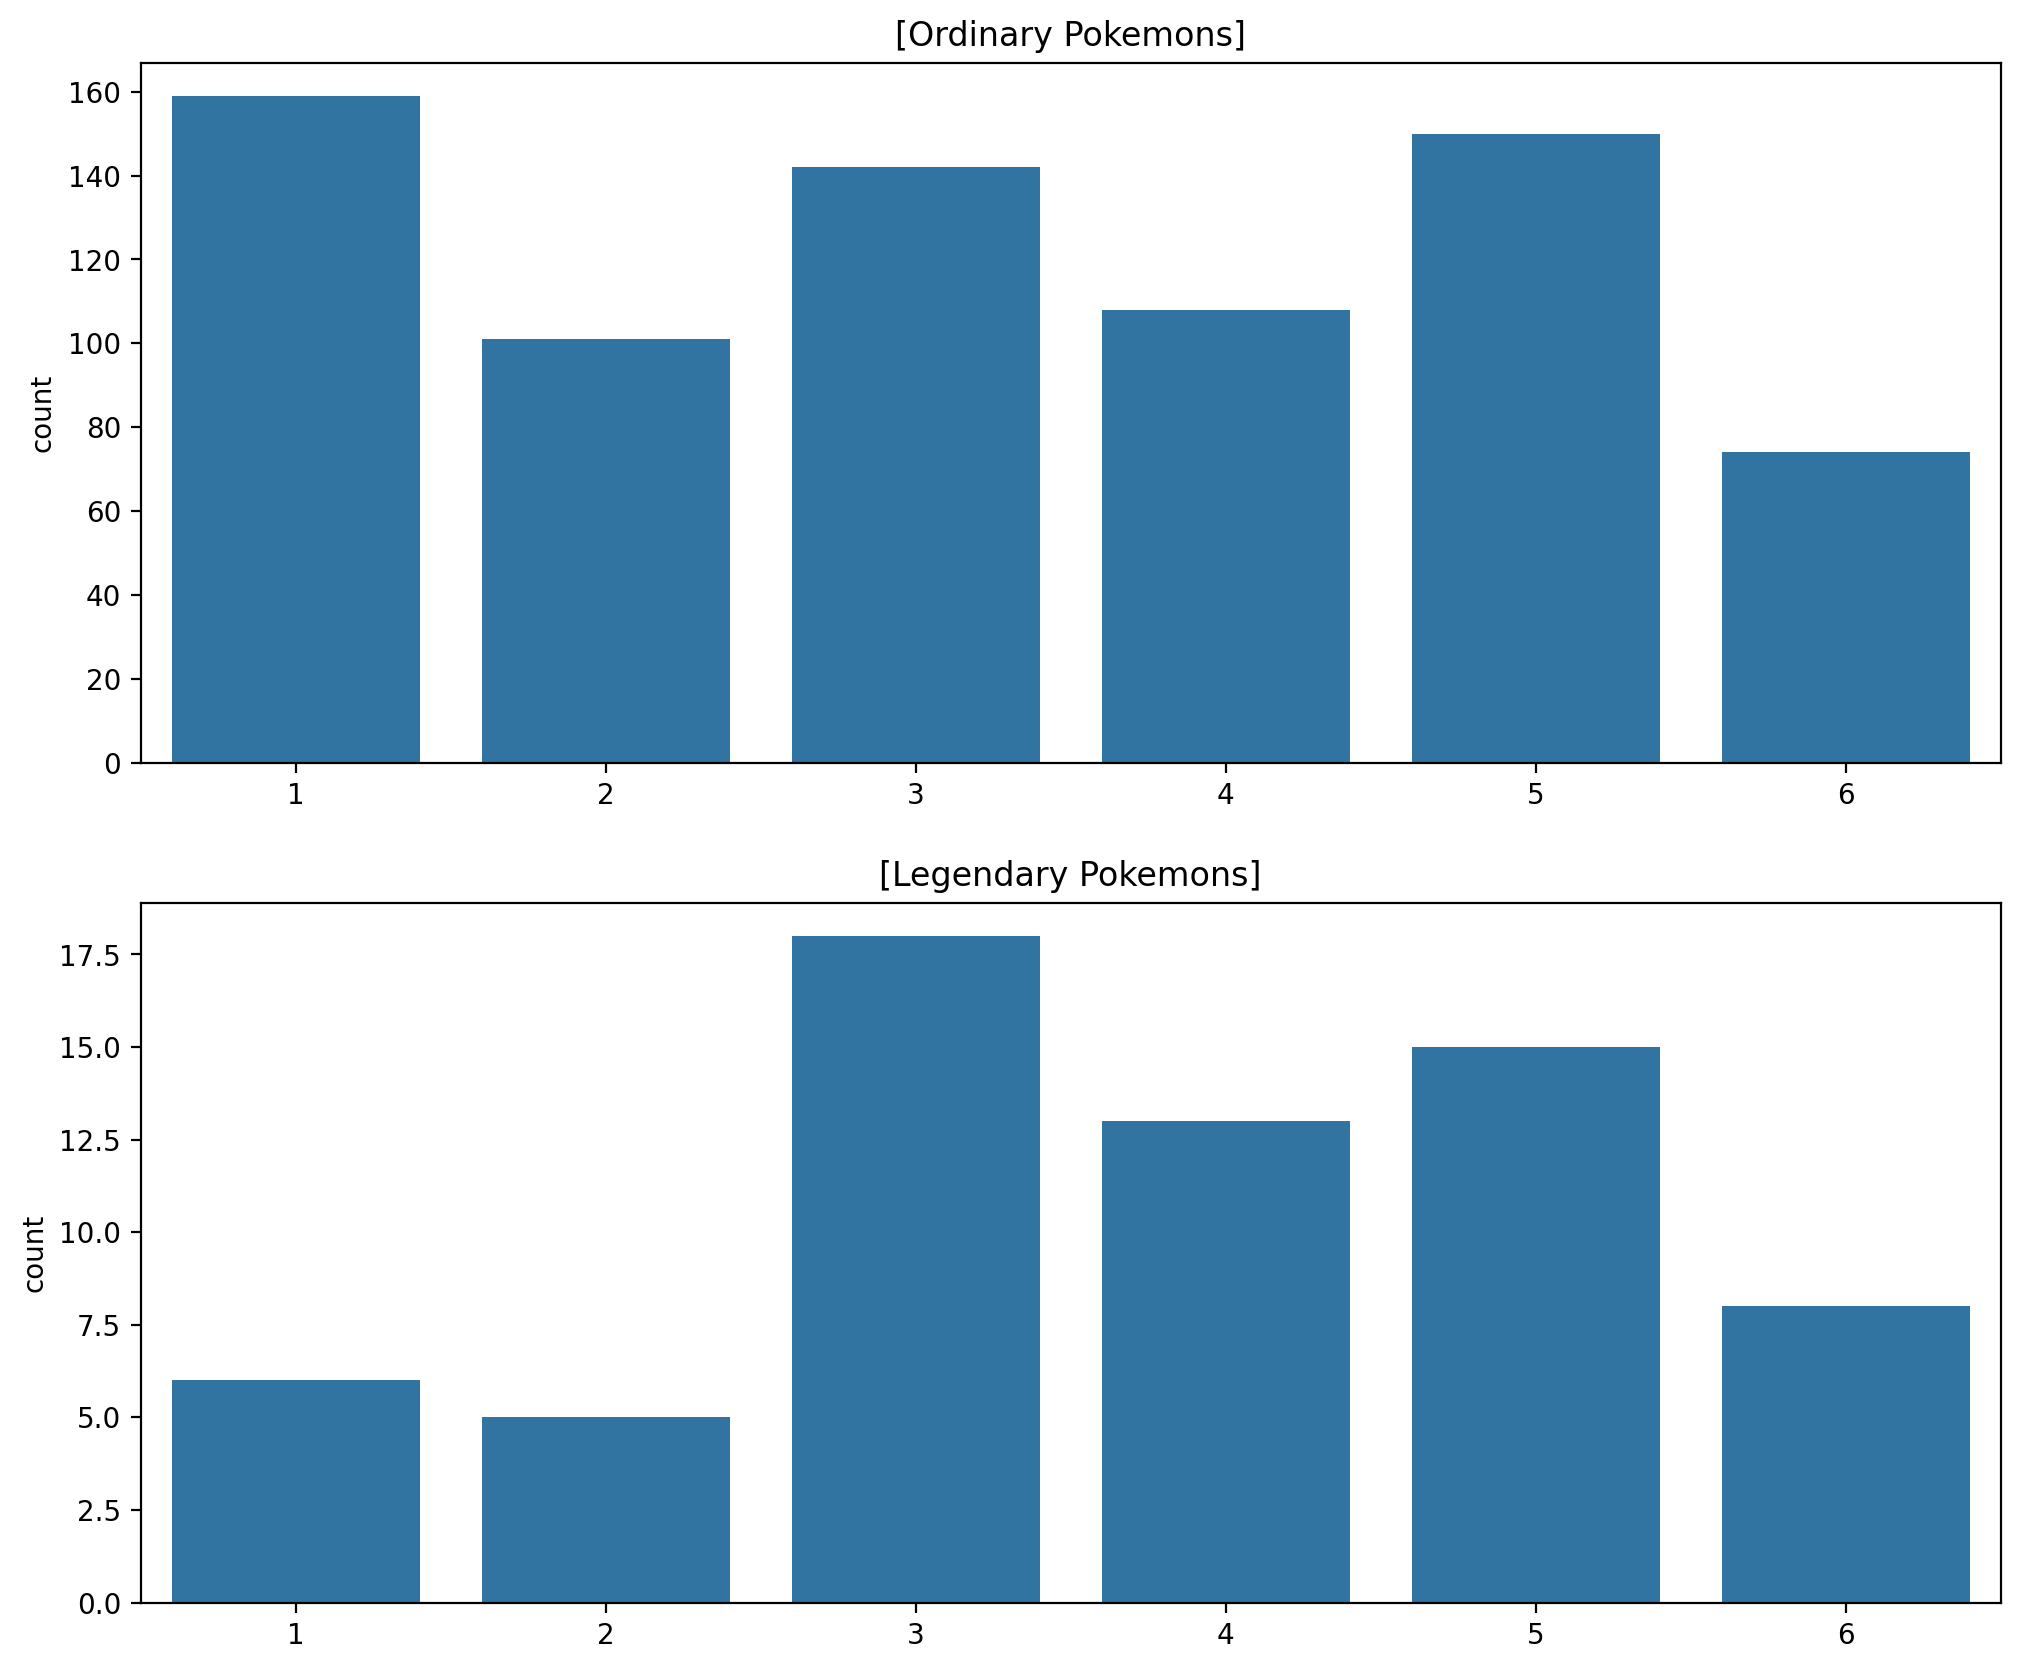

In [109]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

$ 하기 코드는 seaborn의 countplot 함수에 palette 인자를 추가하여 그래프의 색상을 설정하기

<ipython-input-110-f8b15ad5108c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ordinary, x="Generation", palette='Set2').set_xlabel('')  # 'palette' 인자를 추가하여 다양한 색깔을 사용합니다.
<ipython-input-110-f8b15ad5108c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=legendary, x="Generation", palette='Set2').set_xlabel('')  # 'palette' 인자를 추가하여 다양한 색깔을 사용합니다.


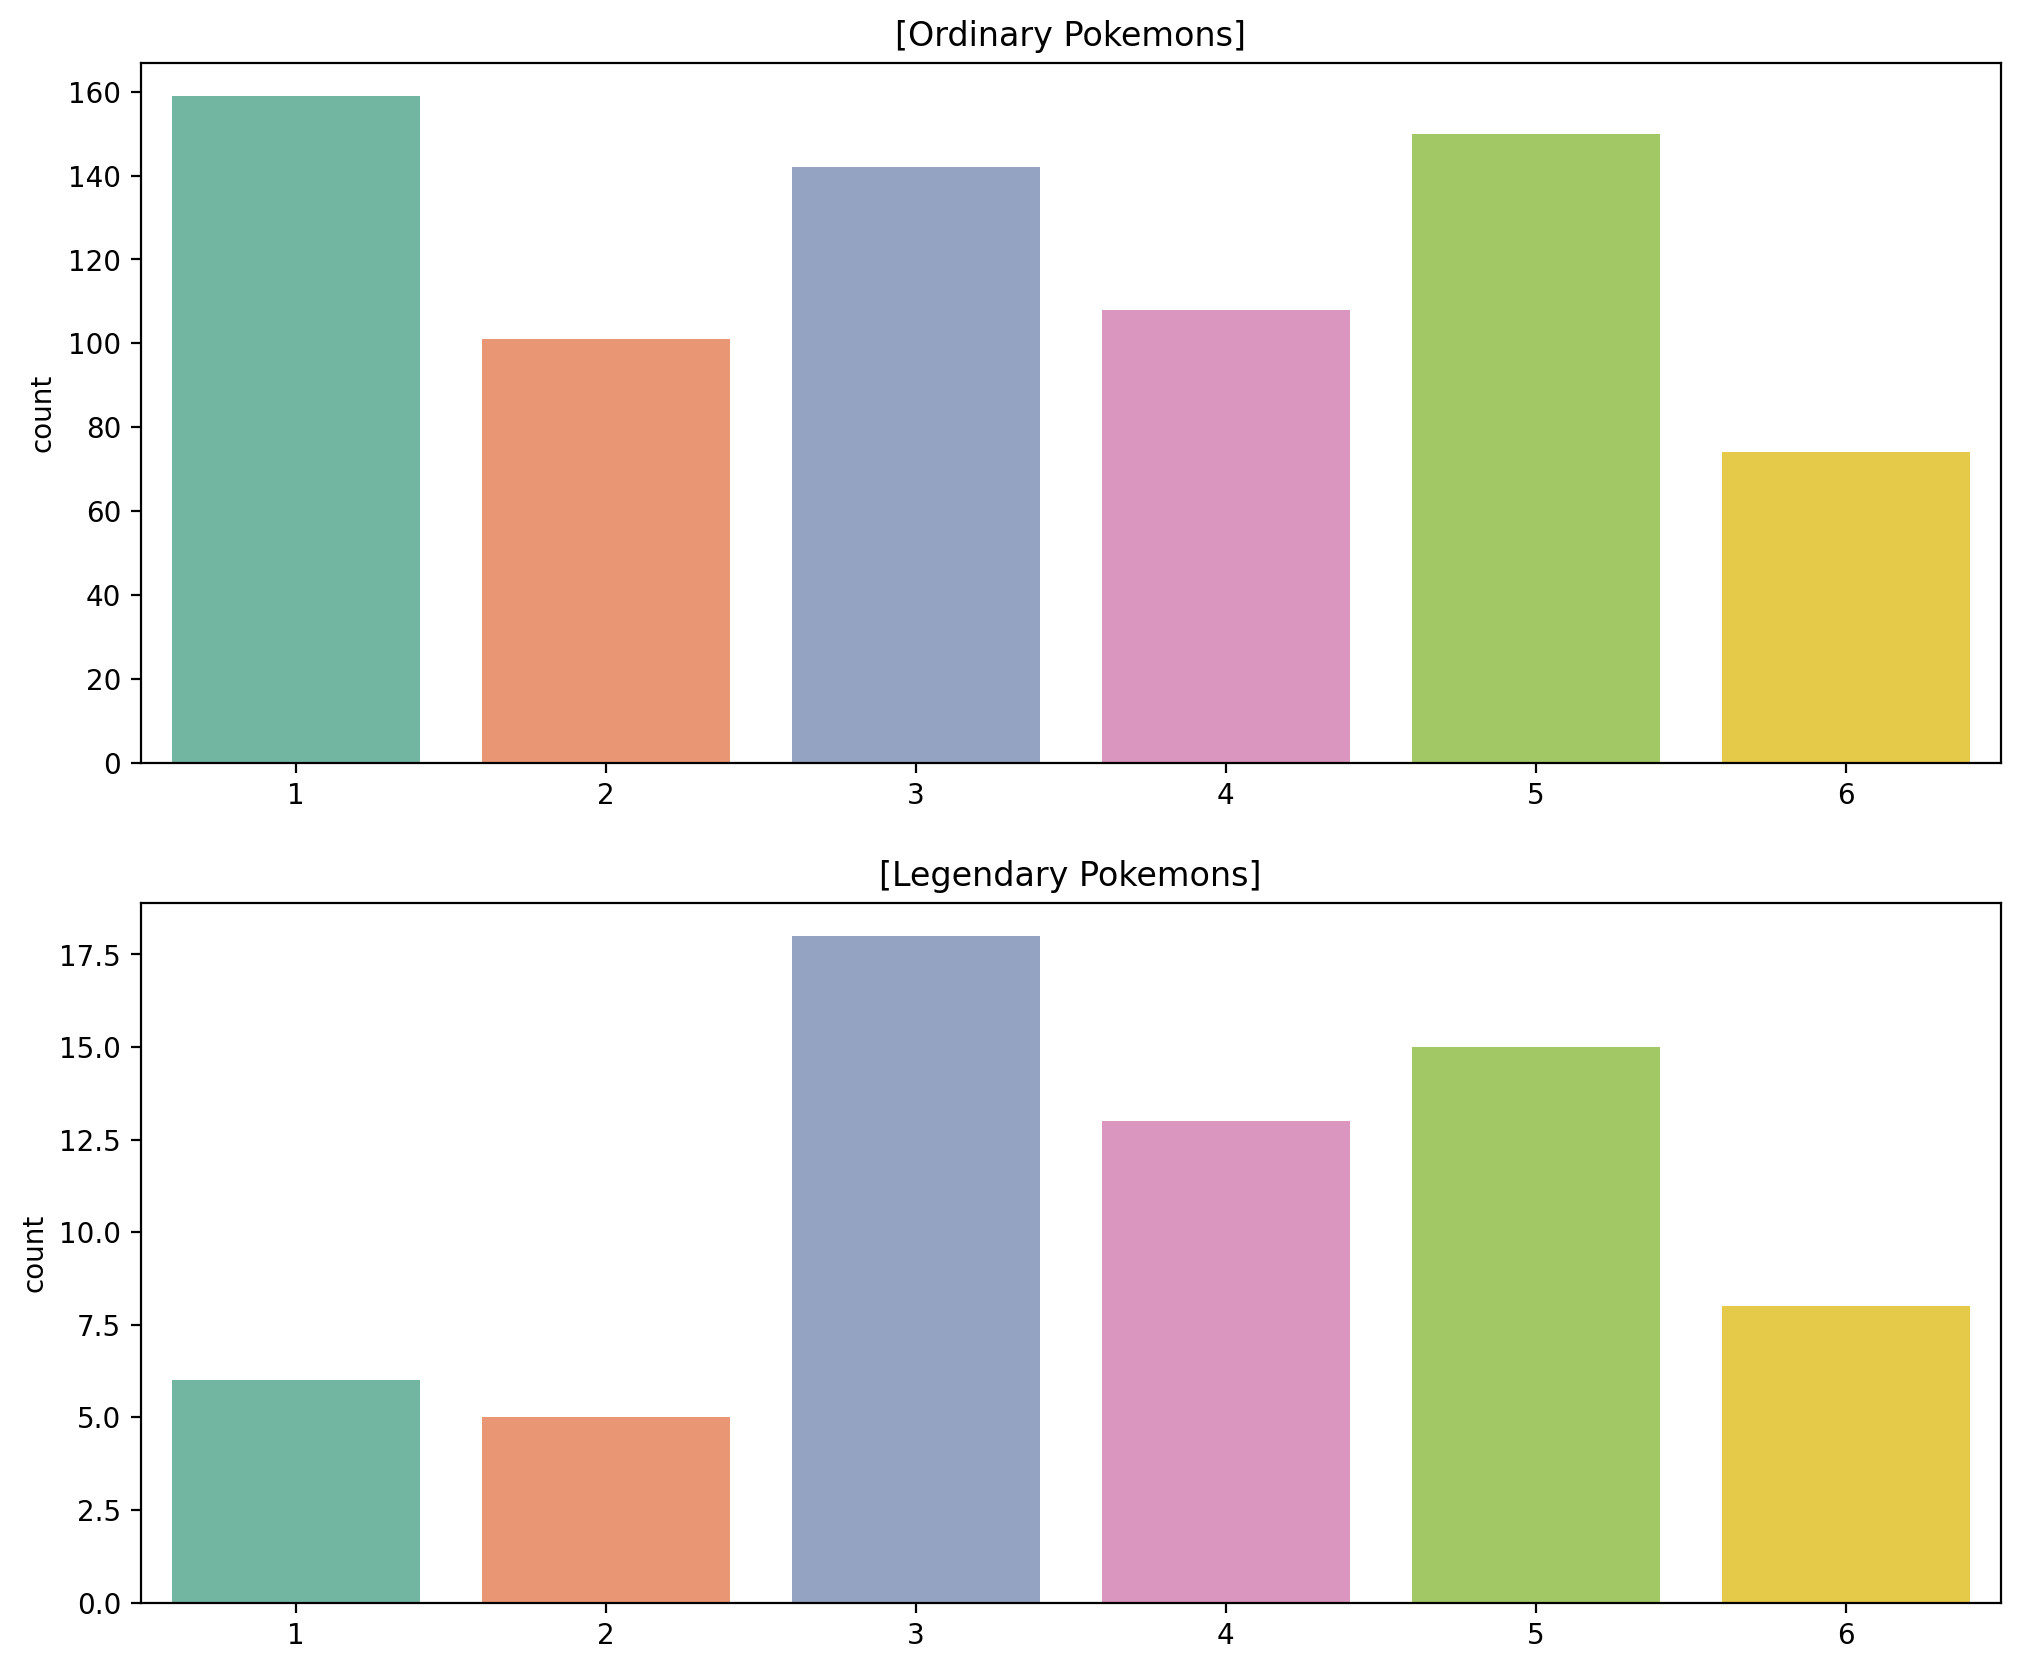

In [110]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation", palette='Set2').set_xlabel('')  # 'palette' 인자를 추가하여 다양한 색깔을 사용합니다.
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Generation", palette='Set2').set_xlabel('')  # 'palette' 인자를 추가하여 다양한 색깔을 사용합니다.
plt.title("[Legendary Pokemons]")

plt.show()


$분석: 전설의 포켓몬은 1, 2세대에는 많지 않은 것으로 추측되며 3세대부터 많아졌다 6세대에 다시 줄어든 것을 확인

$ 전설의 포켓몬의 Total 값

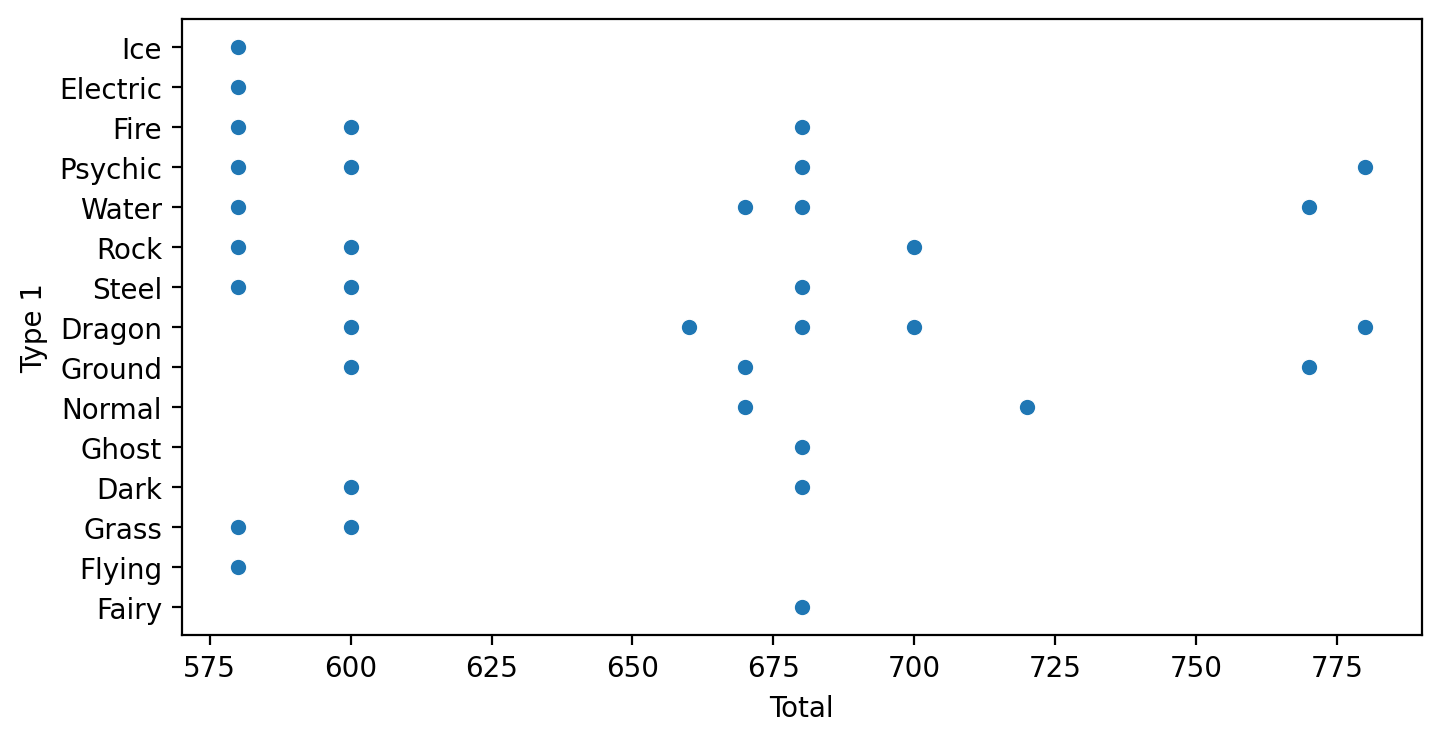

In [111]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [112]:
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


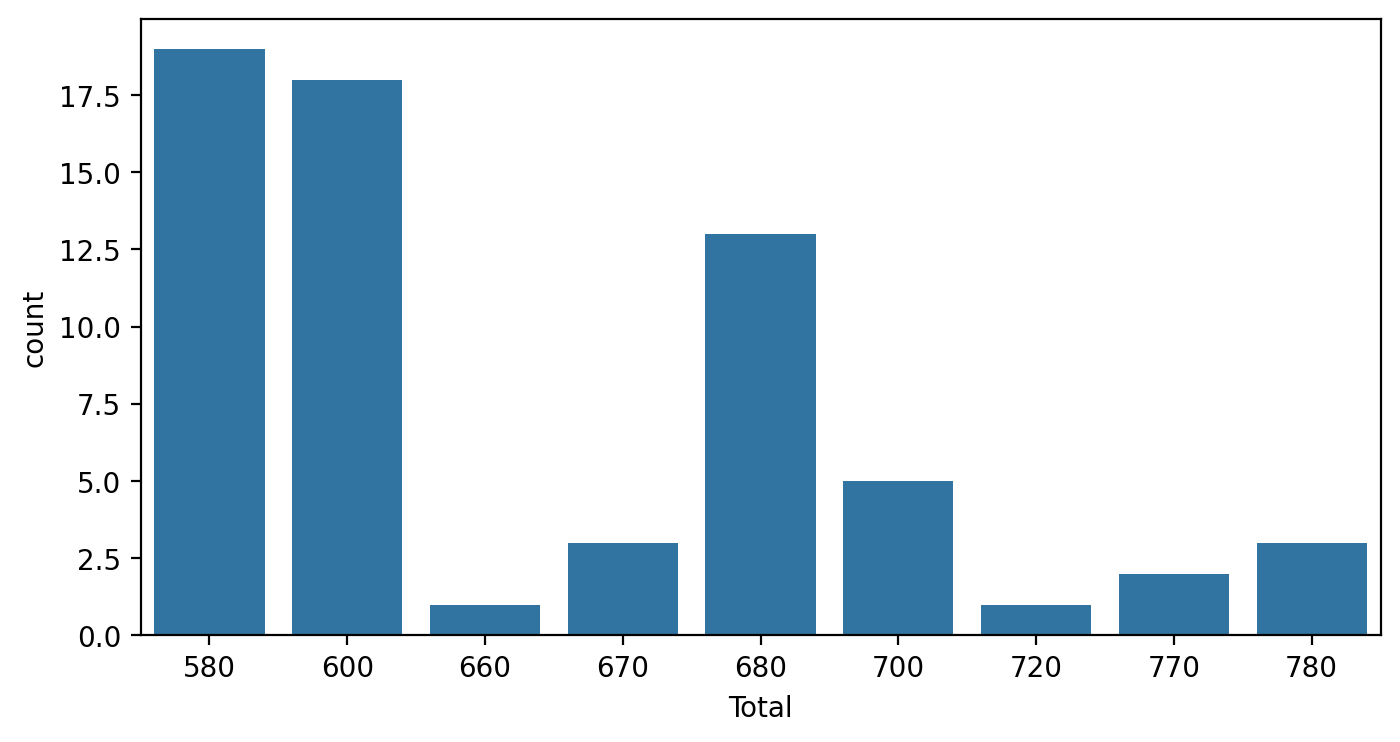

In [113]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

$ 하기 코드는 seaborn의 countplot 함수에 palette 인자를 추가하여 그래프의 색상을 설정하기

### 3. 전설의 포켓몬과 일반 포켓몬, 그 차이는?
우리가 원하는 target의 두드러지는 특징을 특히 자세하게 살펴보았습니다.

<ipython-input-114-16de9ebc89c5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=legendary, x="Total", palette='Set2')


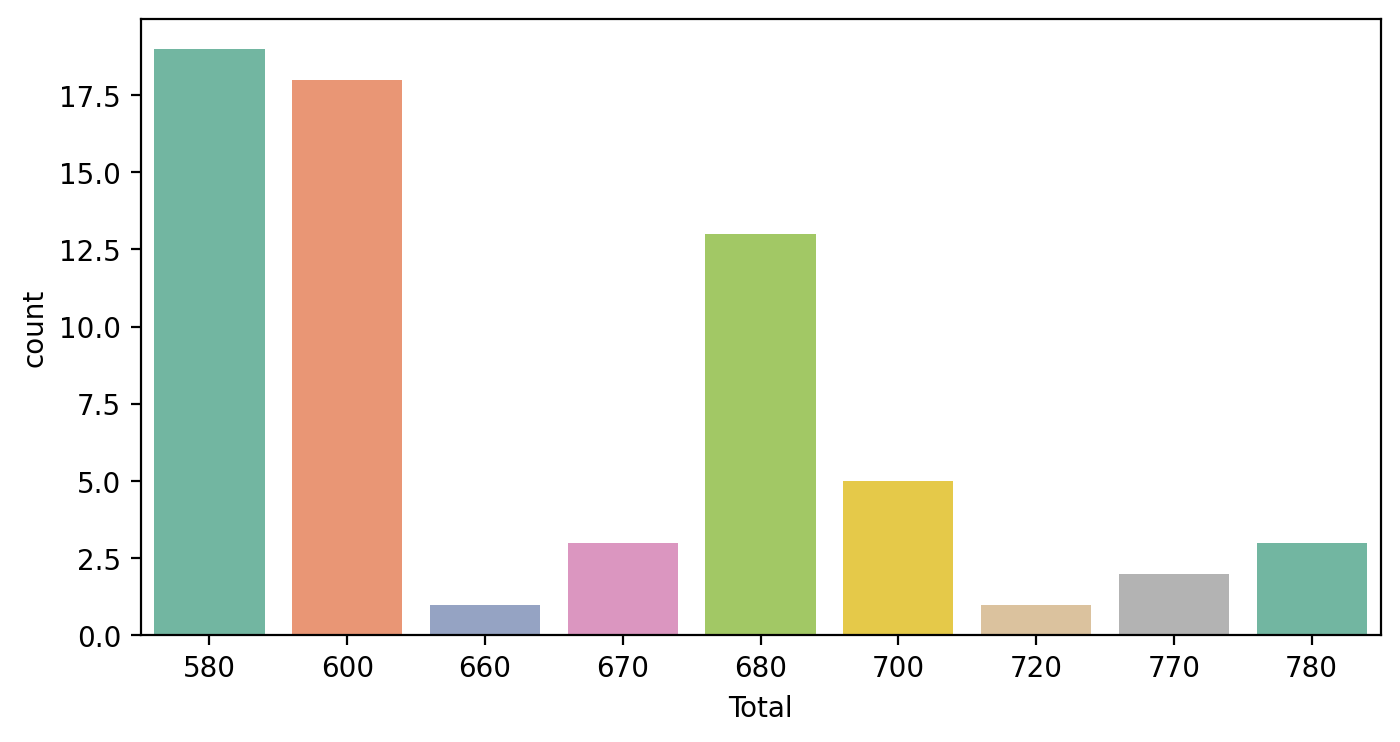

In [114]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

# 'palette' 인자를 추가하여 다양한 색깔을 사용합니다.
sns.countplot(data=legendary, x="Total", palette='Set2')
plt.show()


In [115]:
round(65 / 9, 2)

7.22

In [116]:
# 'ordinary'는 일반 포켓몬을 나타내는 DataFrame입니다.
total_values = ordinary['Total'].values

print(f"일반 포켓몬의 'Total' 값 집합: {total_values}")


일반 포켓몬의 'Total' 값 집합: [318 405 525 625 309 405 534 634 634 314 405 530 630 195 205 395 195 205
 395 495 251 349 479 579 253 413 262 442 288 438 320 485 300 450 275 365
 505 365 505 323 483 299 505 270 435 245 455 320 395 490 285 405 305 450
 265 405 290 440 320 500 305 455 350 555 300 385 510 310 400 500 590 305
 405 505 300 390 490 335 515 300 390 495 410 500 315 490 590 325 465 352
 310 460 325 475 325 500 305 525 310 405 500 600 385 328 483 325 475 330
 480 325 520 320 425 455 455 385 340 490 345 485 450 435 490 590 295 440
 320 450 340 520 460 500 455 490 495 500 600 490 200 540 640 535 288 325
 525 525 525 395 355 495 355 495 515 615 540 300 420 600 600 318 405 525
 309 405 534 314 405 530 215 415 262 442 265 390 250 390 535 330 460 205
 218 210 245 405 320 470 280 365 510 610 490 250 420 410 500 250 340 460
 360 180 425 390 210 430 525 525 405 490 435 336 405 455 290 465 415 430
 510 610 300 450 430 500 600 505 500 600 430 330 500 250 410 250 450 380
 300 480 330 465 465 330 500 

In [117]:
# 'total_values'는 일반 포켓몬의 'Total' 값 집합입니다.
length = len(total_values)

print(f"일반 포켓몬의 'Total' 값 집합의 크기(길이)는 {length}입니다.")


일반 포켓몬의 'Total' 값 집합의 크기(길이)는 734입니다.


In [118]:
round(735 / 195, 2)

3.77

$ 분석: 약 3.77마리만 같은 Total 스탯 값을 보유

1. Total값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 정도되며 전설의 포켓몬의 Total값은 다양하지 않음 (한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지의 여부는 전설의 포켓몬임을 결정하는 데에 영향)

2. 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재. 예를 들어, 680, 720, 770, 780 (Total값은 전설의 포켓몬인지 아닌지를 결정하는 데에 이러한 방식으로도 영향)

3. Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼일 것이라는 결론 도출

$ 특정 단어가 들어가 있는 이름

In [119]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


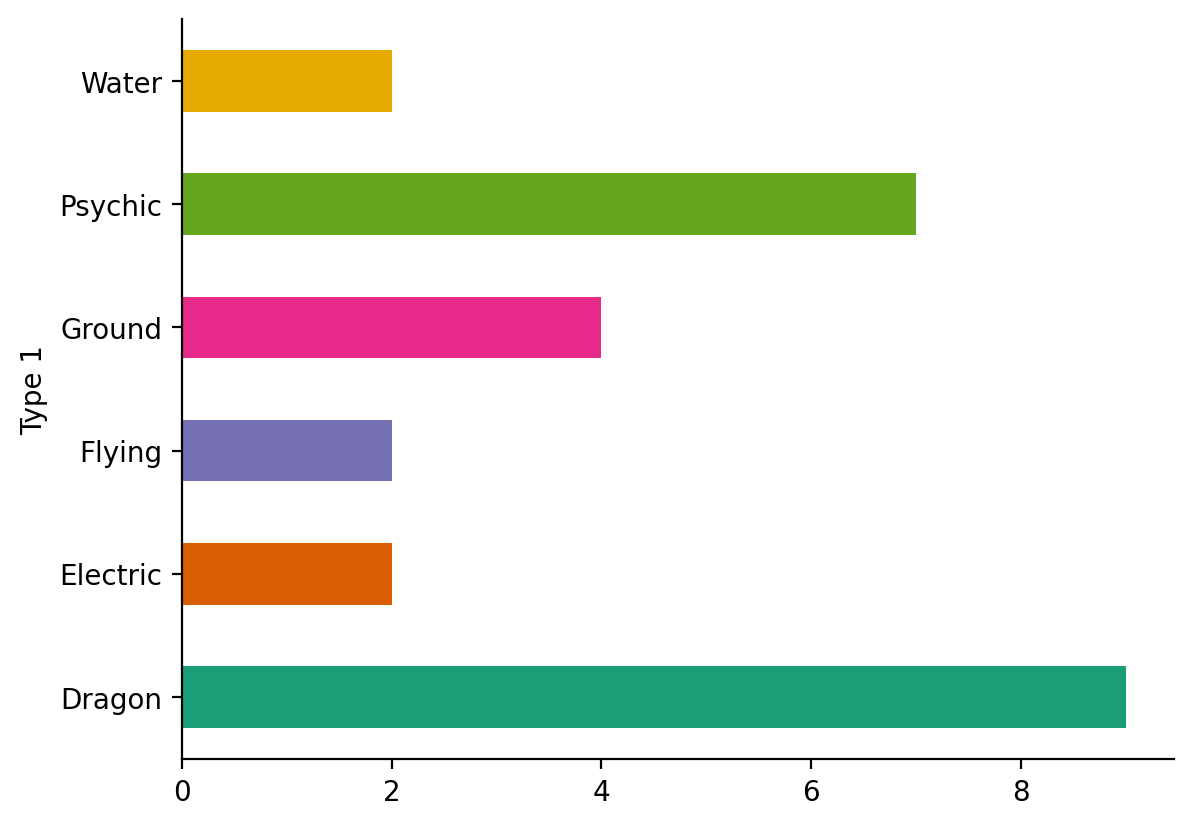

In [120]:
# @title Type 1

from matplotlib import pyplot as plt
import seaborn as sns
names.groupby('Type 1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [123]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [125]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [126]:
# 'name_count'는 포켓몬 이름의 길이를 나타냅니다.
ordinary['name_count'] = ordinary['Name'].apply(len)


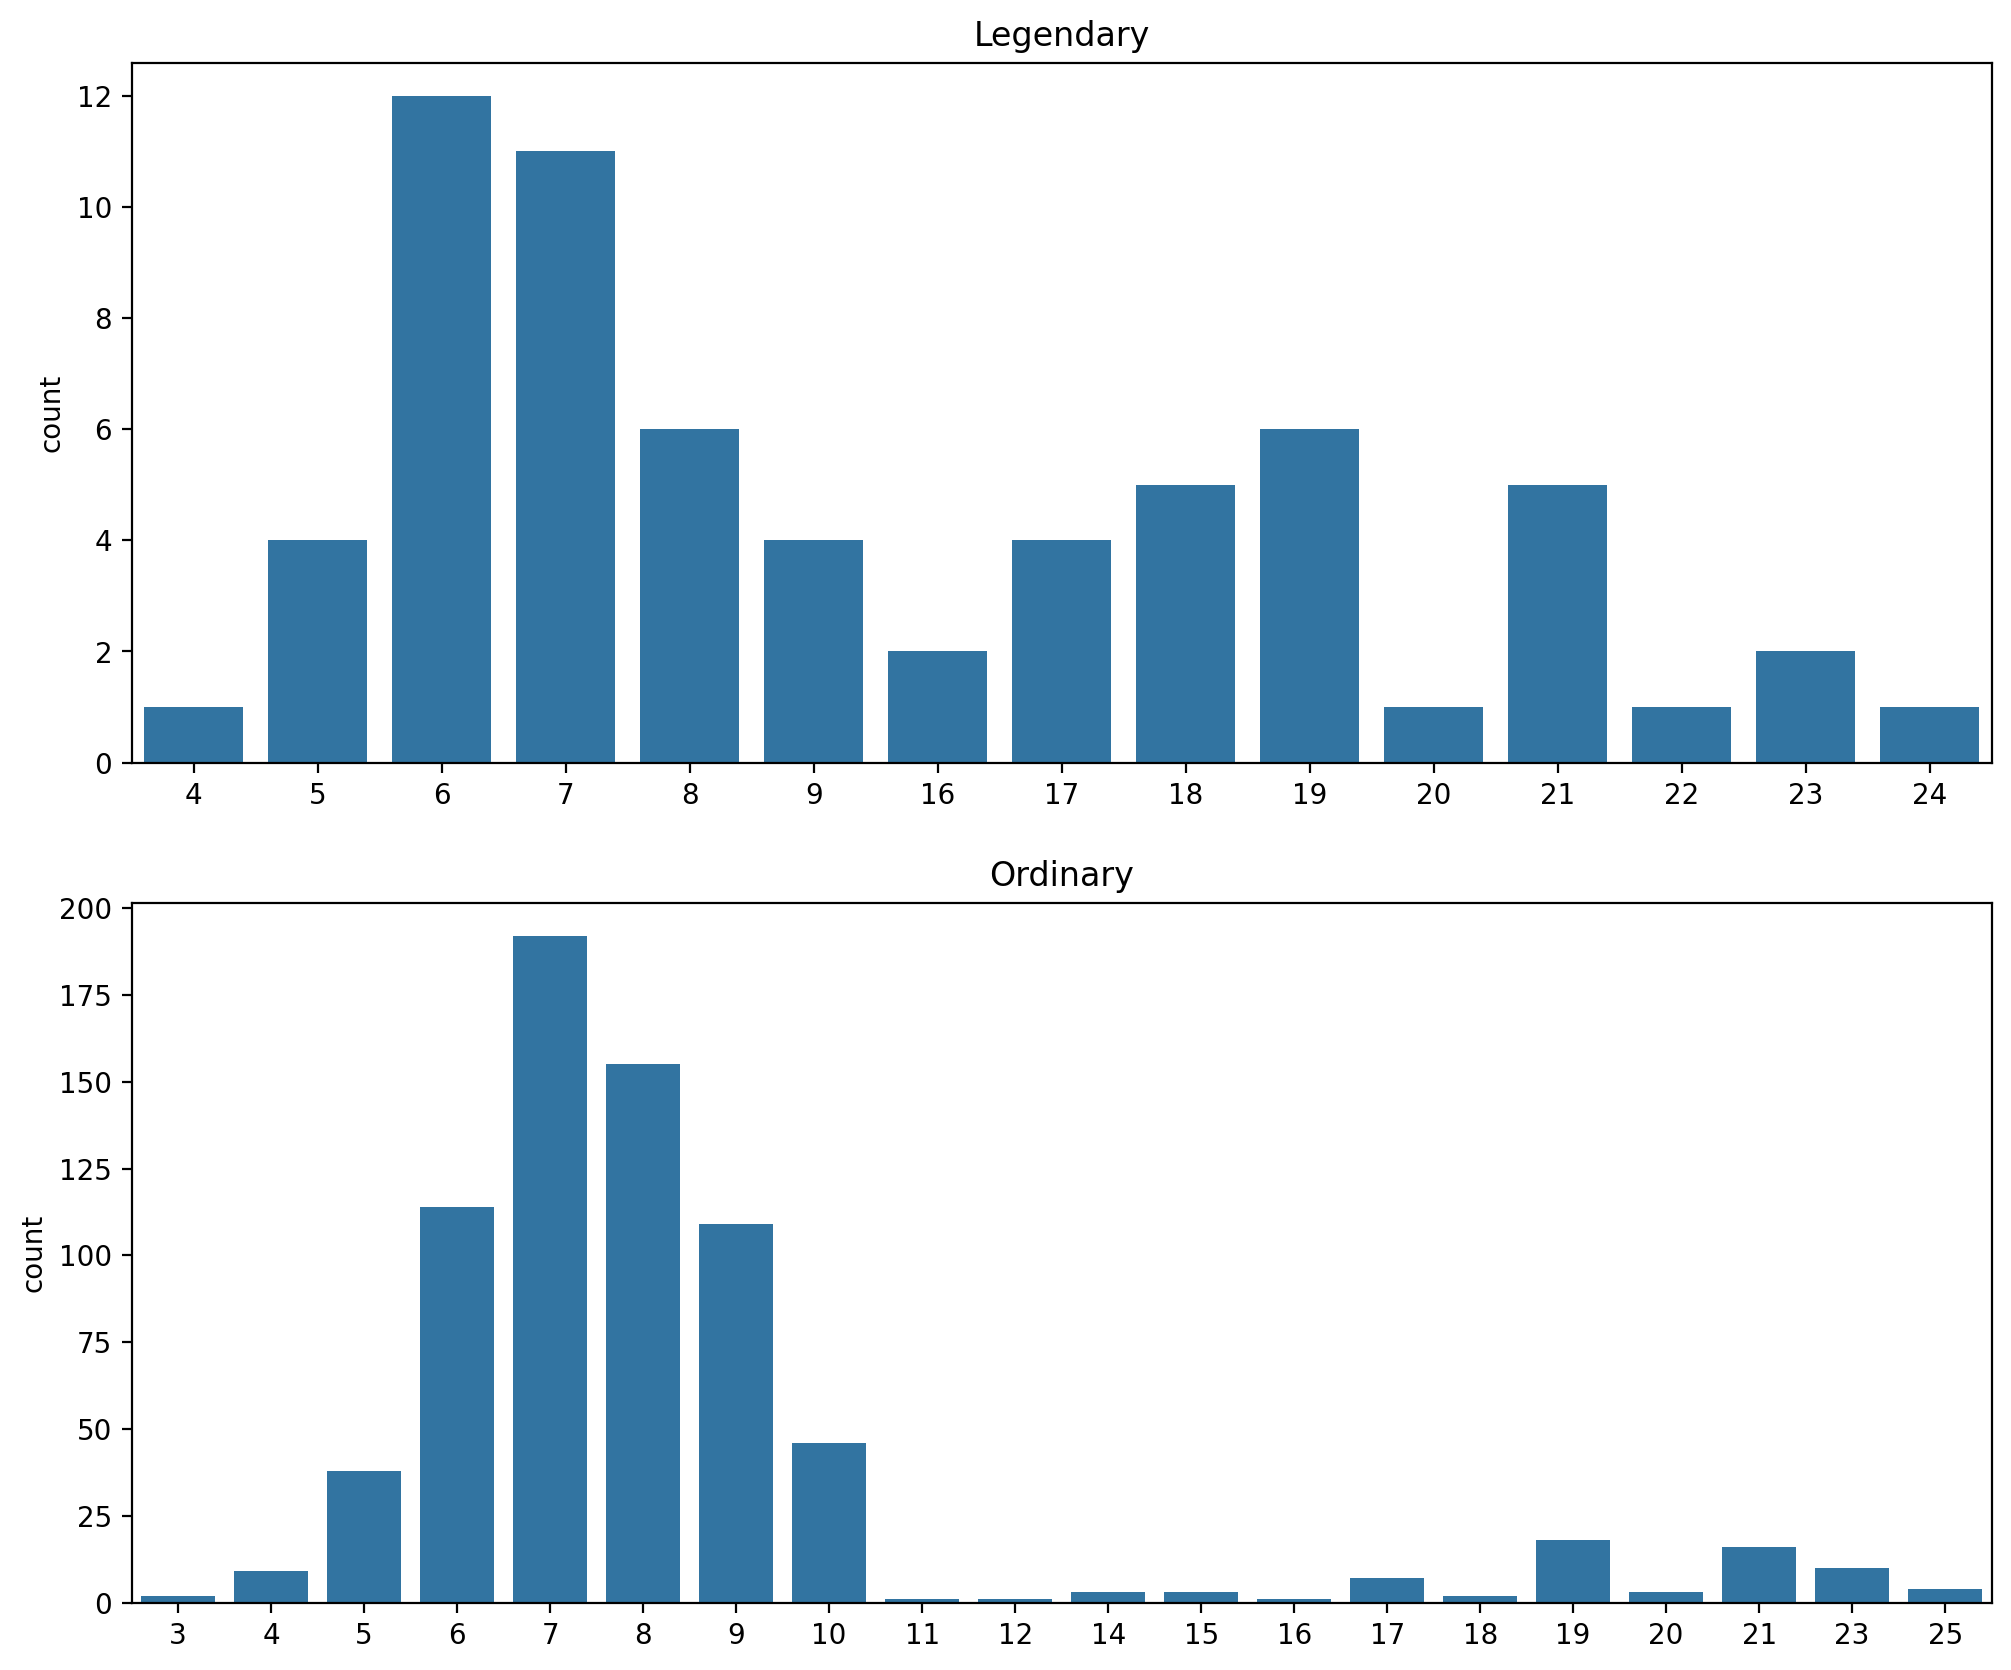

In [127]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

$ 이미지에 나타난 바 그래프의 색상을 코드에 반영하기 위해, palette 인자를 sns.countplot 함수에 추가한 코드

<ipython-input-131-2e4ea167f3cc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=legendary, x="name_count", palette=legendary_palette).set_xlabel('')
<ipython-input-131-2e4ea167f3cc>:7: UserWarning: 
The palette list has fewer values (6) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=legendary, x="name_count", palette=legendary_palette).set_xlabel('')
<ipython-input-131-2e4ea167f3cc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ordinary, x="name_count", palette=ordinary_palette).set_xlabel('')
<ipython-input-131-2e4ea167f3cc>:14: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which m

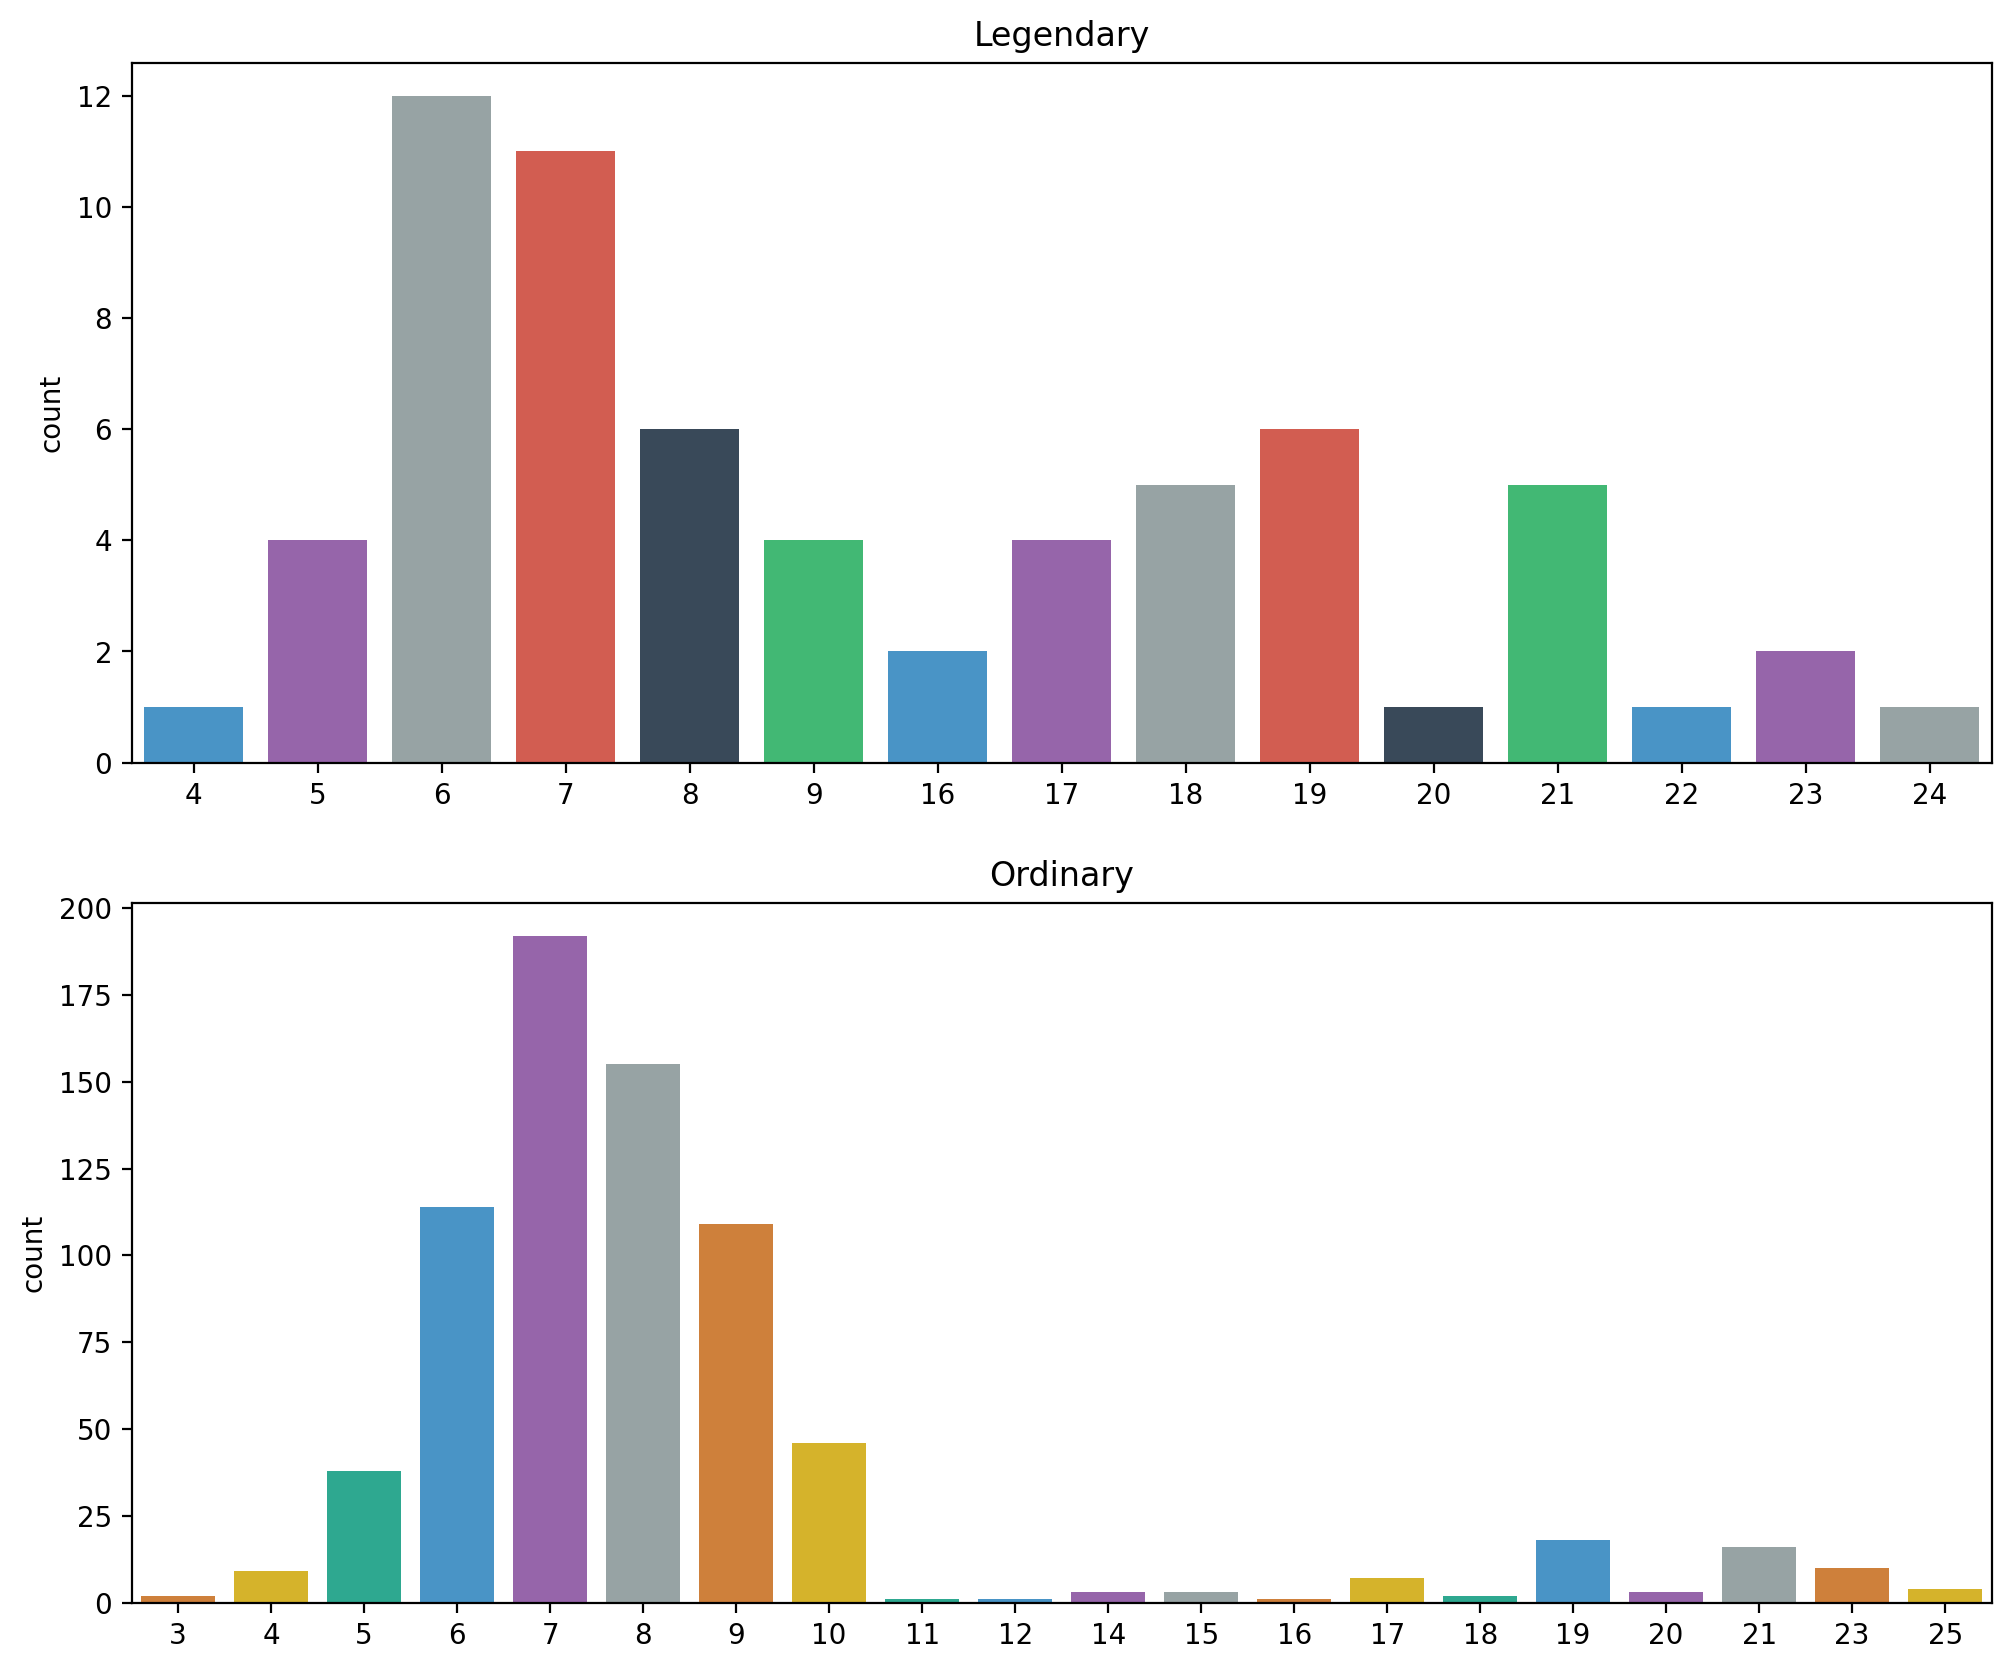

In [131]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# 'Legendary' 그래프의 색상 팔레트를 정의합니다.
legendary_palette = ["#3498db", "#9b59b6", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

plt.subplot(211)
sns.countplot(data=legendary, x="name_count", palette=legendary_palette).set_xlabel('')
plt.title("Legendary")

# 'Ordinary' 그래프의 색상 팔레트를 정의합니다.
ordinary_palette = ["#e67e22", "#f1c40f", "#1abc9c", "#3498db", "#9b59b6", "#95a5a6"]

plt.subplot(212)
sns.countplot(data=ordinary, x="name_count", palette=ordinary_palette).set_xlabel('')
plt.title("Ordinary")

plt.show()


전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많은 반면, 일반 포켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주 낮습니다.

In [132]:
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [133]:
# 'ordinary'는 일반 포켓몬을 나타내는 DataFrame입니다.
# 'Name' 열의 각 값에 대해 len 함수를 적용하여 이름의 길이를 계산합니다.
name_lengths = ordinary['Name'].apply(len)

# 이름의 길이가 10 이상인 포켓몬의 수를 계산합니다.
num_name_length_10_or_more = (name_lengths >= 10).sum()

# 전체 포켓몬의 수를 계산합니다.
total_pokemon = len(ordinary)

# 확률을 계산합니다.
probability = num_name_length_10_or_more / total_pokemon

print(f"일반 포켓몬의 이름이 10글자 이상일 확률은 {probability}입니다.")


일반 포켓몬의 이름이 10글자 이상일 확률은 0.1566757493188011입니다.


$분석: 전설의 포켓몬의 이름이 10 이상일 확률은 41% 를 넘는 반면에, 일반 포켓몬의 이름이 10 이상일 확률은 약 16% 밖에 되지 않음
이는 아주 큰 차이이므로 legendary인지 아닌지를 구분하는 데에 큰 의미가 존재

이름 분석에 대한 두가지 중요한 시사점

1. 만약 "Latios"가 전설의 포켓몬이라면, "%%% Latios" 또한 전설의 포켓몬이다!
2. 적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다!
3. 전설의 포켓몬은 긴 이름을 가졌을 확률이 높다!


### 4. 모델에 넣기 위해! 데이터 전처리하기
데이터를 머신러닝 모델에 넣기 적합한 형태로 전처리하기

$ 1. 이름의 길이 : name_count 컬럼을 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼을 생성

2. 토큰 추출 : legendary 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩(One-Hot Encoding)으로 처리

In [134]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [135]:
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


In [136]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [137]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [138]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(10, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran?,Poison,NaN,275,55,47,52,40,40,41,1,False,9,False,Nidoran?,False
37,32,Nidoran??Poison,NaN,273,46,57,40,40,40,50,1,FALSE,NaN,15,True,Nidoran??Poison,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
737,669,FlabÃ©bÃ©,Fairy,NaN,303,44,38,39,61,79,42,6,False,9,False,FlabÃ©bÃ©,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [139]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran?,Poison,NaN,275,55,47,52,40,40,41,1,False,9,False,Nidoran?,False
37,32,Nidoran??Poison,NaN,273,46,57,40,40,40,50,1,FALSE,NaN,15,True,Nidoran??Poison,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [140]:
# 'Name' 컬럼에서 공백을 제거하여 'Name_nospace' 컬럼을 만듭니다.
pokemon['Name_nospace'] = pokemon['Name'].str.replace(" ", "")

# 'Name_nospace' 컬럼이 알파벳 문자만으로 이루어졌는지 확인합니다.
pokemon['name_isalpha'] = pokemon['Name_nospace'].str.isalpha()

# 'name_isalpha' 값이 False인 포켓몬을 출력합니다.
print(pokemon[pokemon["name_isalpha"] == False])


       #             Name  Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  \
34    29        Nidoran?  Poison    NaN    275  55      47       52       40   
37    32  Nidoran??Poison     NaN    273     46  57      40       40       40   
737  669        FlabÃ©bÃ©   Fairy    NaN    303  44      38       39       61   

     Sp. Def  Speed Generation Legendary  name_count  long_name  \
34        40     41          1     False           9      False   
37        50      1      FALSE       NaN          15       True   
737       79     42          6     False           9      False   

        Name_nospace  name_isalpha  
34         Nidoran?         False  
37   Nidoran??Poison         False  
737        FlabÃ©bÃ©         False  


$ 분석: name_isalpha 컬럼이 False인 컬럼이 전혀 없다는 것은 모든 이름이 알파벳으로만 이루어졌음을 으미

1. 이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기
이제 모든 이름은 세 가지 타입으로 나뉘므로 토큰화(tokenizing)할 수 있습니다.
이름에 있는 토큰을 추출하기 위해 이름을 토큰화 (모든 토큰으로 분리) 할 수 있는 함수를 생성해 주겠습니다.
문자열을 처리할 때는 주로 정규표현식(RegEx: Regular Expression) 이라는 기법이 사용됩니다.
정규표현식이란 문자열을 처리하는 방법의 하나로, 특정한 조건을 만족하는 문자를 검색하거나 치환하는 등의 작업을 하고 싶을 때 간편하게 처리할 수 있게 해주는 도구입니다.

In [141]:
import re

In [142]:
name = "CharizardMega Charizard X"

In [143]:
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [144]:
temp = name_split[0]
temp

'CharizardMega'

In [145]:
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [146]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

이 함수를 사용하면, 예를 들어 "Hello, World!"라는 문자열을 [‘Hello,’, ‘World!’]라는 토큰 리스트로 변환할 수 있습니다. 이 코드를 실행하기 전에, 'name’이 올바른 문자열인지 확인하세요. 이 값은 각 열에 들어갈 값들의 리스트여야 합니다. 이 리스트의 길이는 DataFrame의 행 수와 동일해야 합니다. 이렇게 하면 'name’을 토큰화할 수 있습니다.

In [147]:
def tokenize(name):
    # 문자열을 공백을 기준으로 분리합니다.
    tokens = name.split()

    return np.array(tokens)


In [148]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['CharizardMega', 'Charizard', 'X'], dtype='<U13')

In [149]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

68
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'MewtwoMega', 'Mewtwo', 'X', 'MewtwoMega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho-oh', 'Regirock', 'Regice', 'Registeel', 'Latias', 'LatiasMega', 'Latias', 'Latios', 'LatiosMega', 'Latios', 'Kyogre', 'KyogrePrimal', 'Kyogre', 'Groudon', 'GroudonPrimal', 'Groudon', 'Rayquaza', 'RayquazaMega', 'Rayquaza', 'Jirachi', 'DeoxysNormal', 'Forme', 'DeoxysAttack', 'Forme', 'DeoxysDefense', 'Forme', 'DeoxysSpeed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'GiratinaAltered', 'Forme', 'GiratinaOrigin', 'Forme', 'Darkrai', 'ShayminLand', 'Forme', 'ShayminSky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'TornadusIncarnate', 'Forme', 'TornadusTherian', 'Forme', 'ThundurusIncarnate', 'Forme', 'ThundurusTherian', 'Forme', 'Reshiram', 'Zekrom', 'LandorusIncarnate', 'Forme', 'LandorusTherian', 'Forme', 'Kyurem', 'KyuremBlack', 'Kyurem', 'KyuremWhite', 'Kyurem', 'Xerneas', 'Yvelt

$ 분석:

1. 중복된 것을 제외하면 총 65개의 토큰이 있는대 여기서 많이 사용된 토큰을 추출하기
2. list 또는 set의 자료형에서 각 요소의 개수를 다루고 싶을 때에는 파이썬의 collection이라는 패키지를 사용하면 편리
3. collection은 순서가 있는 딕셔너리인 OrderedDict, 요소의 개수를 카운트하는 Counter 등 여러 다양한 모듈을 제공
4. 이 중 우리는 토큰이 사용된 개수를 알고 싶기 때문에 Counter 객체를 사용하였음

In [150]:
from collections import Counter

In [151]:
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [152]:
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [153]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mewtwo', 3),
 ('Kyurem', 3),
 ('MewtwoMega', 2),
 ('Latias', 2),
 ('Latios', 2),
 ('Kyogre', 2),
 ('Groudon', 2),
 ('Rayquaza', 2),
 ('Diancie', 2)]

In [154]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mewtwo,Kyurem,MewtwoMega,Latias,Latios,Kyogre,Groudon,Rayquaza,Diancie
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,False,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,False,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,False,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


$ 분석: 이름에 맞게 True 또는 False가 처리된 것을 확인할 수 있음
이제 전설의 포켓몬이 많이 가지는 Forme와 같은 토큰의 컬럼 값이 True라면 그 포켓몬은 전설의 포켓몬일 확률이 높다고 판단할 수 있음

$ 회고와 의미: 문자열로 구성된 이름을 전처리를 통해 True, False의 부울 데이터로 변환시켜 보았는데 머신러닝 모델 학습에서 문자열 데이터는 가치있는 정보를 가지고 있지만 문자열 그대로 학습에 사용할 수는 없기에 적절한 방법을 통해서 문자열 데이터를 숫자나 부울 데이터로 변환해서 정보를 넣어주면 모델의 성능을 올리는 데에 도움을 줄 수 있다는 것을 배웠다.

$ 하기의 규칙으로 범주형 데이터를 전처리하기

1. 18가지의 모든 Type를 모두 원-핫 인코딩(One-Hot Encoding)
2. 두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 갖도록 설정하기

In [155]:
print(types)

['Electric', 'Psychic', 'Poison', 'Grass', 'Ground', 'Normal', 'Flying', nan, 'Fire', 'Bug', 'Dragon', 'Fighting', 'Dark', 'Ghost', 'Fairy', 'Water', 'Steel', 'Rock', 'Ice']


In [156]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Electric,Psychic,Poison,Grass,Ground,Normal,Flying,NaN,...,Bug,Dragon,Fighting,Dark,Ghost,Fairy,Water,Steel,Rock,Ice
0,Grass,Poison,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Grass,Poison,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Grass,Poison,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Grass,Poison,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


$ 가장 기본 데이터로 만드는 베이스라인(Baseline)

In [157]:
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [158]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [159]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [160]:
target = 'Legendary'

$ 데이터 분리에는 sklearn.model_selection 모듈 안의 train_test_split 함수를 사용

In [161]:
# 'original_data'에서 'features' 컬럼이 있는지 확인합니다.
if 'features' in original_data.columns:
    # 'features' 컬럼이 있다면, 해당 컬럼을 'X'에 저장합니다.
    X = original_data['features']
    print(X.shape)
    print(X.head())
else:
    print("'features' 컬럼이 'original_data'에 없습니다.")


'features' 컬럼이 'original_data'에 없습니다.


In [162]:
print(df.columns)

Index(['Legendary', 'Type 2'], dtype='object')


In [164]:
y = df['Legendary']
print(y.shape)
y.head()


(4,)


0    False
1     True
2    False
3     True
Name: Legendary, dtype: bool

In [165]:
# 'features'에 저장된 컬럼들을 'original_data'에서 선택하여 'X'에 저장합니다.
X = original_data[features]
print(X.shape)
print(X.head())

# 'target' 컬럼의 데이터를 'y'에 저장합니다.
y = original_data[target]
print(y.shape)
print(y.head())

# sklearn.model_selection 모듈의 train_test_split 함수를 사용하여 데이터를 훈련 데이터와 테스트 데이터로 분리합니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(800, 8)
   Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed Generation
0    318  45      49       49       65       65     45          1
1    405  60      62       63       80       80     60          1
2    525  80      82       83      100      100     80          1
3    625  80     100      123      122      120     80          1
4    309  39      52       43       60       50     65          1
(800,)
0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: object
(640, 8) (640,)
(160, 8) (160,)


$ 학습 데이터에는 640개의 데이터가, 테스트 데이터에는 160개의 데이터가 투입되었음

### 5. 가랏, 몬스터볼!
 의사 결정 트리 모델 학습시키기

$ 분류 모델로 가볍게 의사 결정 트리(decision tree) 를 사용

In [166]:
from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


$ 의사 결정 트리를 활용해서 학습시킨 후 결과를 비교하기

In [167]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [233]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [237]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더를 생성합니다.
le = LabelEncoder()

# 'y_train'의 레이블을 숫자로 변환합니다.
y_train = le.fit_transform(y_train)

# 이제 모델을 학습시킬 수 있습니다.
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')


슝=3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [238]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더를 생성합니다.
le = LabelEncoder()

# 'y_test'의 레이블을 숫자로 변환합니다.
y_test = le.fit_transform(y_test)

# 이제 confusion_matrix를 계산할 수 있습니다.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[146,   0],
       [  0,  14]])

In [180]:
len(legendary)

65

In [181]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       146
           1       0.64      0.64      0.64        14

    accuracy                           0.94       160
   macro avg       0.80      0.80      0.80       160
weighted avg       0.94      0.94      0.94       160



$  0.62에 그쳤던 recall값이 무려 0.92로까지 올랐음!!!

In [182]:
print(len(pokemon.columns))
print(pokemon.columns)

46
Index([           '#',         'Name',       'Type 1',       'Type 2',
              'Total',           'HP',       'Attack',      'Defense',
            'Sp. Atk',      'Sp. Def',        'Speed',   'Generation',
          'Legendary',   'name_count',    'long_name', 'Name_nospace',
       'name_isalpha',        'Forme',       'Mewtwo',       'Kyurem',
         'MewtwoMega',       'Latias',       'Latios',       'Kyogre',
            'Groudon',     'Rayquaza',      'Diancie',     'Electric',
            'Psychic',       'Poison',        'Grass',       'Ground',
             'Normal',       'Flying',            nan,         'Fire',
                'Bug',       'Dragon',     'Fighting',         'Dark',
              'Ghost',        'Fairy',        'Water',        'Steel',
               'Rock',          'Ice'],
      dtype='object')


In [183]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [184]:
target = "Legendary"
target

'Legendary'

In [195]:
# Q. 사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
X = df["Legendary"]
print(X.shape)
X.head()


(799,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: object

In [196]:
# Q. 정답 데이터 'y'도 'target' 변수를 이용해 만들어줍시다.
y = df["Legendary"]
print(y.shape)
y.head()


(799,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: object

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(639,) (639,)
(160,) (160,)


In [198]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [239]:
DecisionTreeClassifier(random_state=25)

DecisionTreeClassifier(random_state=25)

In [241]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 초기화
le = LabelEncoder()

# y_train 레이블을 숫자로 변환
y_train = le.fit_transform(y_train)


In [242]:
# train 데이터로 모델 학습
model.fit(X_train, y_train)

# test 데이터로 예측
predictions = model.predict(X_test)

print(predictions)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [209]:
# Reshape X_test to a 2D array before prediction
X_test = X_test.values.reshape(-1, 1)  # If X_test has a single feature

# train 데이터로 모델 학습
model.fit(X_train, y_train)

# test 데이터로 예측
predictions = model.predict(X_test)

print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [244]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 초기화
le = LabelEncoder()

# y_test와 predictions 레이블을 숫자로 변환
y_test = le.fit_transform(y_test)
predictions = le.transform(predictions)


Confusion Matrix:
[[146   0]
 [  0  14]]


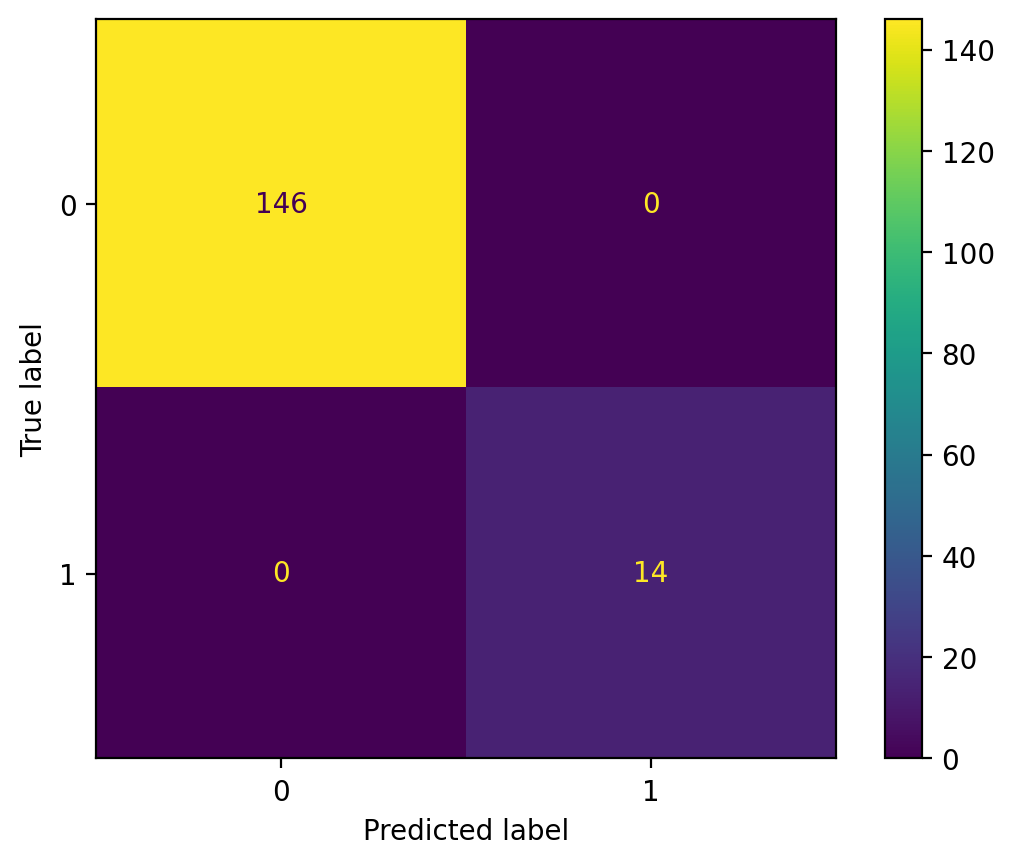

In [246]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix 계산
cm = confusion_matrix(y_test, predictions)

print("Confusion Matrix:")
print(cm)

# Confusion Matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

$ 분석: 위 값은 왼쪽 위부터 순서대로 TN, FP, FN, TP를 표시
우리의 데이터에서는 Positive는 Legendary=True(전설의 포켓몬), Negative는 Legendary=False(일반 포켓몬)를 표시

위 수치를 해석하면

TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.
FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.
FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.
TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.

총 160개의 학습 데이터 중 FP와 FN은 합쳐서 14개뿐이니 나쁘지 않은 결과라고 할 수 있음

In [247]:
from sklearn.metrics import classification_report

# 실제 레이블과 예측 레이블을 리스트로 정의합니다.
# 이미지에서 얻은 confusion matrix에 따르면,
# 클래스 '0'에 대해 146개의 true positive와 0개의 false negative가 있습니다.
# 클래스 '1'에 대해 14개의 true positive와 0개의 false positive가 있습니다.
y_true = [0]*146 + [1]*14
y_pred = [0]*146 + [1]*14

# Classification Report 계산
report = classification_report(y_true, y_pred)

print("Classification Report:")
print(report)



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        14

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



$ 마지막 질문: Seaborn 라이브러리의 여러 가지 그래프 중에서, 다음을 표현할 때 사용했던 plot의 종류를 복습해봅시다.
① 포켓몬의 속성별로 몇 개의 데이터가 있는지 확인
② 각각의 스탯에 대해 전설 포켓몬과 일반 포켓몬 데이터 분포를 비교

① 포켓몬의 속성별로 몇 개의 데이터가 있는지 확인하려면, countplot을 사용하면 됩니다. 이는 각 카테고리별로 데이터의 수를 세어주는 기능을 가지고 있습니다.

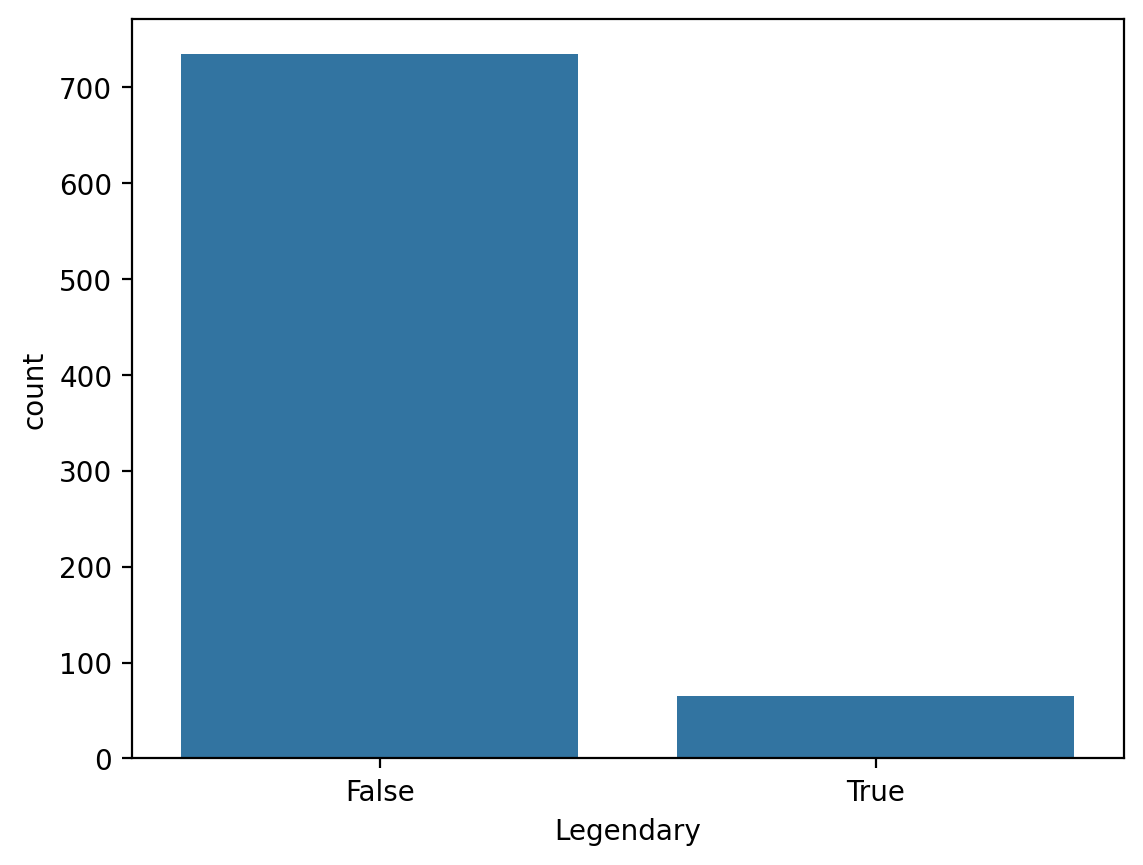

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임 이름이 df라고 가정하고, 'Type'이라는 컬럼에 속성 정보가 있다고 가정
sns.countplot(x='Legendary', data=df)
plt.show()


② 각각의 스탯에 대해 전설 포켓몬과 일반 포켓몬 데이터 분포를 비교하려면, histplot 또는 kdeplot을 사용하면 됩니다. 이는 데이터의 분포를 시각화하는데 유용합니다.

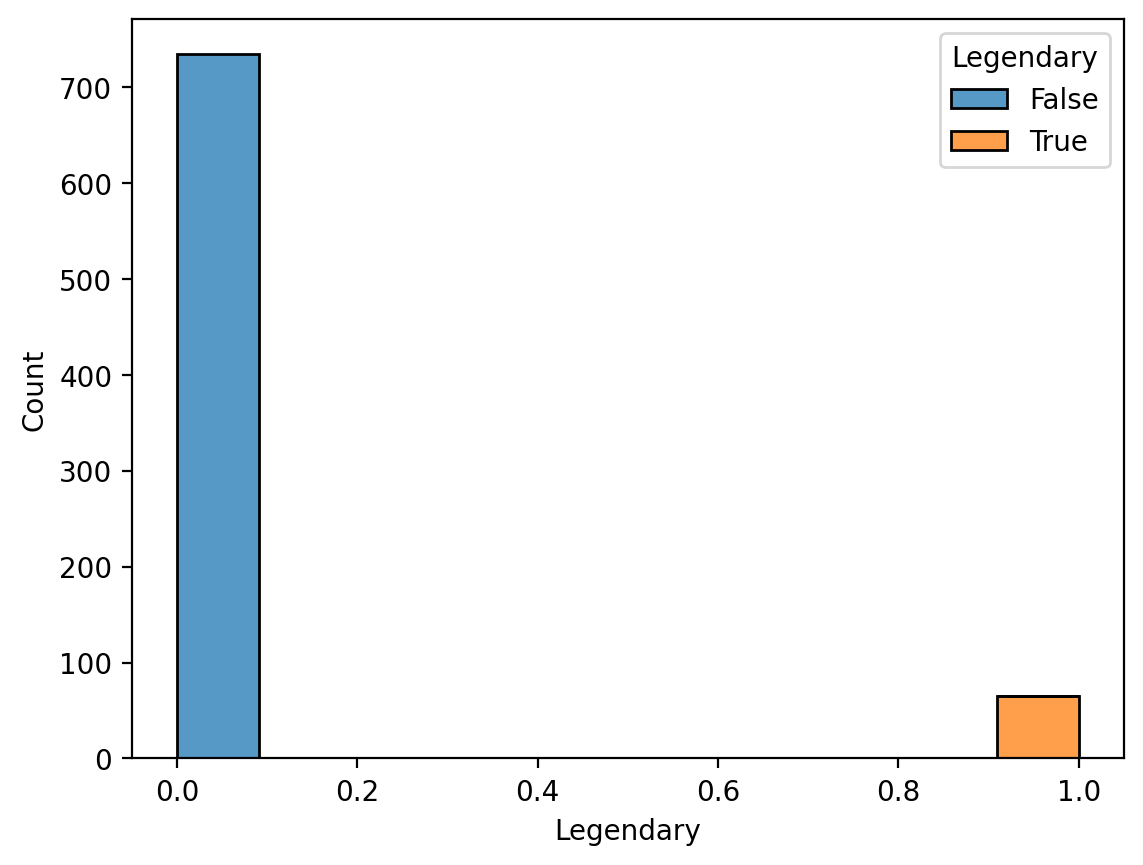

In [221]:
# 'Legendary'라는 컬럼에 전설 포켓몬 여부가 있고, 'Stat'라는 컬럼에 스탯 정보가 있다고 가정
sns.histplot(data=df, x='Legendary', hue='Legendary', multiple='stack')
plt.show()


### 최종회고:

1. 데이터 수집: 캐글 웹사이트에서 포켓몬 데이터를 찾아내고 이를 준비하는 과정은 데이터 과학 프로젝트의 첫걸음이었으며 데이터 수집의 기본적인 스킬을 익히는 좋은 기회였습니다.

2. 데이터 탐색: 전체 데이터셋을 꼼꼼히 탐색하는 과정을 통해 데이터의 구조를 이해하고 어떤 정보가 담겨있는지 파악할 수 있었는데 이 과정에서 데이터의 특성을 분석하고 이상치를 찾아내는 방법을 배웠습니다.

3. 데이터 분석: 전설의 포켓몬과 일반 포켓몬의 차이를 분석하는 과정에서는 데이터를 깊게 이해하는 능력을 키울 수 있어고 원하는 target의 두드러지는 특징을 자세하게 살펴보는 것은 매우 유익했습니다.

4. 데이터 전처리: 데이터를 머신러닝 모델에 넣기 적합한 형태로 전처리하는 과정을 통해 데이터 전처리의 중요성과 다양한 전처리 기법을 배웠습니다.

5. 모델 학습 및 성능 향상: 베이스라인 모델을 학습시키고 처리한 데이터로 성능을 올리는 과정은 무척 흥미로웠는데 이를 통해 머신러닝 모델의 작동 원리를 이해하고 어떻게 성능을 향상시킬 수 있는지 배웠습니다.

이 프로젝트를 통해 데이터 과학의 전체적인 숲을 살펴볼 수 있었으며 각 단계에서 필요한 스킬을 조금이나마 배울 수 있었습니다.